In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore", message="could not open file to read NUMA node")
warnings.filterwarnings("ignore", message="PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG")
warnings.filterwarnings("ignore", message="Your kernel may have been built without NUMA support.")
warnings.filterwarnings("ignore", message="PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG")
# Importing Deep Learning Libraries
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

2024-03-20 03:55:40.051403: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-20 03:55:40.106457: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-20 03:55:40.824131: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-03-20 03:55:41.524702: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 03:55:41.553216: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 03:55:41.553266: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


## Importing Xception Model

In [3]:
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [4]:
base_dir = "images/"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

training_set = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=128,
                                             image_size=(48, 48),
                                             color_mode="rgb",
                                             label_mode ="categorical")

val_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=128,
                                                  image_size=(48, 48),
                                                  color_mode="rgb",
                                                  label_mode ="categorical")

Found 48531 files belonging to 7 classes.


2024-03-20 03:56:29.353522: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 03:56:29.353595: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 03:56:29.353611: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 03:56:29.500434: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 03:56:29.500544: I external/local_xla/xla/stream_executor

Found 7101 files belonging to 7 classes.


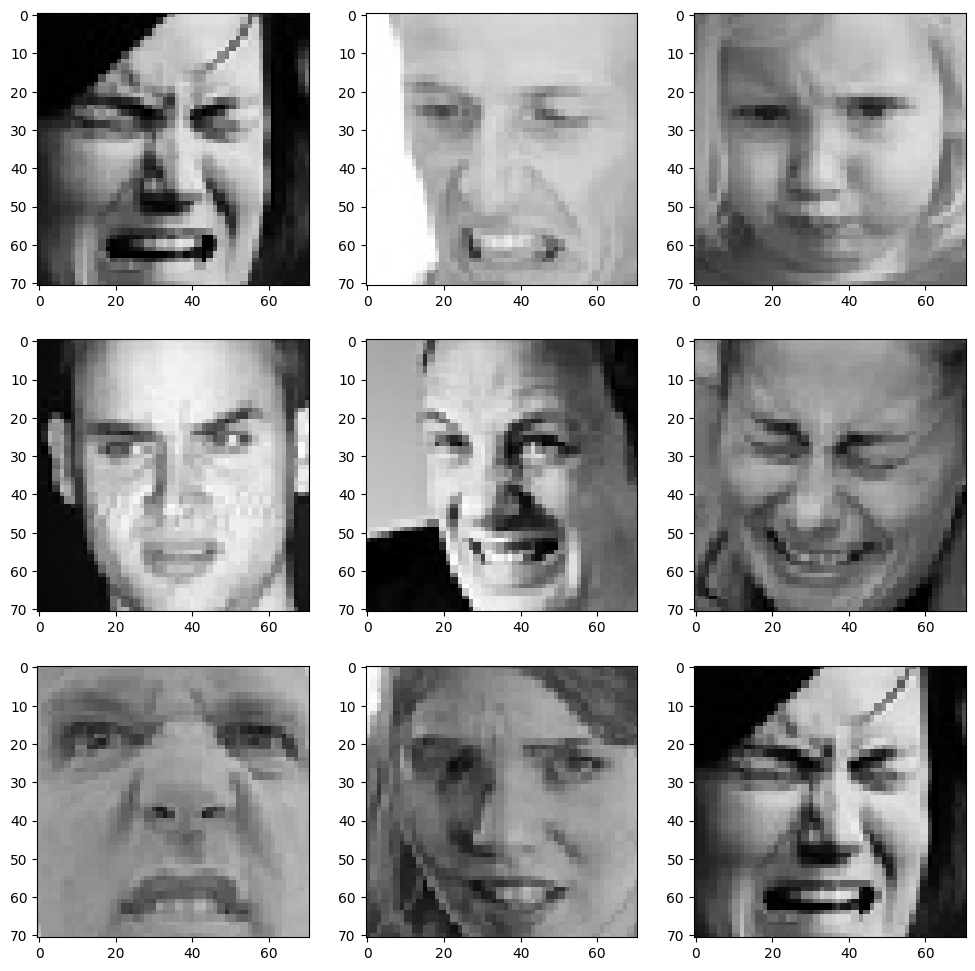

In [6]:
expression = 'disgust'
picture_size = 71
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(base_dir+"train/"+expression+"/"+os.listdir(base_dir + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [13]:
data_augmentation = Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    ]
)

2024-03-19 16:45:13.182309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:45:13.574816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:45:13.765960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


(71, 71, 3)


2024-03-19 16:45:14.374951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


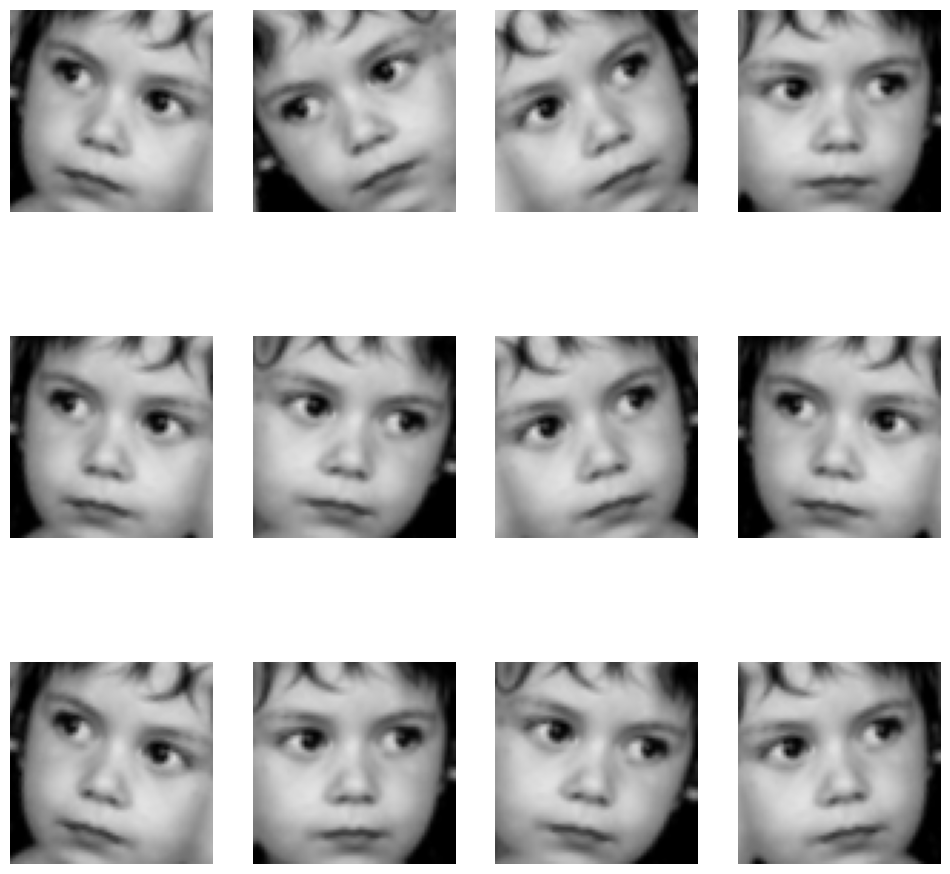

In [17]:
for images, labels in training_set.take(1):
    plt.figure(figsize=(12, 12))
    first_image = images[0]
    print(first_image.shape)
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0)
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.axis("off")

In [18]:
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(71,71, 3),
    include_top=False) 
base_model.trainable = False

In [19]:
inputs = keras.Input(shape=(71, 71, 3))
x = data_augmentation(inputs) 

In [20]:
x = tf.keras.applications.xception.preprocess_input(x)

In [21]:
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(7,activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [23]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  

In [24]:
model.compile(optimizer='adam', 
            loss="categorical_crossentropy",
            metrics=["accuracy"])
model.fit(training_set, epochs=20, validation_data=val_dataset)

Epoch 1/20


2024-03-19 16:47:14.203950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:14.620152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:14.806712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 52s 142ms/step - accuracy: 0.3404 - loss: 1.7051

2024-03-19 16:47:16.064289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 53s 146ms/step - accuracy: 0.3341 - loss: 1.7202

2024-03-19 16:47:17.190346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 52s 145ms/step - accuracy: 0.3321 - loss: 1.7237

2024-03-19 16:47:17.669775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 49s 141ms/step - accuracy: 0.3302 - loss: 1.7239

2024-03-19 16:47:18.766778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 33/380 ━━━━━━━━━━━━━━━━━━━━ 50s 146ms/step - accuracy: 0.3300 - loss: 1.7233

2024-03-19 16:47:19.537380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:19.566021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 49s 148ms/step - accuracy: 0.3305 - loss: 1.7181

2024-03-19 16:47:21.815760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:22.010377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 47s 145ms/step - accuracy: 0.3315 - loss: 1.7138

2024-03-19 16:47:22.887652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:23.082500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step - accuracy: 0.3316 - loss: 1.7134

2024-03-19 16:47:23.089425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 46s 144ms/step - accuracy: 0.3318 - loss: 1.7122

2024-03-19 16:47:23.506712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:23.620367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:23.674256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 62/380 ━━━━━━━━━━━━━━━━━━━━ 45s 144ms/step - accuracy: 0.3320 - loss: 1.7115

2024-03-19 16:47:23.728490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 45s 144ms/step - accuracy: 0.3321 - loss: 1.7109

2024-03-19 16:47:24.092027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 45s 145ms/step - accuracy: 0.3323 - loss: 1.7096

2024-03-19 16:47:24.769217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 43s 144ms/step - accuracy: 0.3326 - loss: 1.7082

2024-03-19 16:47:25.544451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:25.648170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 43s 143ms/step - accuracy: 0.3328 - loss: 1.7077

2024-03-19 16:47:25.763960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 42s 143ms/step - accuracy: 0.3330 - loss: 1.7070

2024-03-19 16:47:26.203905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 42s 143ms/step - accuracy: 0.3331 - loss: 1.7068

2024-03-19 16:47:26.429422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 42s 146ms/step - accuracy: 0.3336 - loss: 1.7051

2024-03-19 16:47:27.756312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - accuracy: 0.3341 - loss: 1.7024

2024-03-19 16:47:31.193634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:31.377591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 40s 153ms/step - accuracy: 0.3342 - loss: 1.7019

2024-03-19 16:47:32.030924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/380 ━━━━━━━━━━━━━━━━━━━━ 40s 155ms/step - accuracy: 0.3343 - loss: 1.7013

2024-03-19 16:47:33.110926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.3344 - loss: 1.7006

2024-03-19 16:47:34.307351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 40s 159ms/step - accuracy: 0.3345 - loss: 1.7004

2024-03-19 16:47:34.894054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 38s 165ms/step - accuracy: 0.3349 - loss: 1.6984

2024-03-19 16:47:38.617507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 38s 168ms/step - accuracy: 0.3351 - loss: 1.6976

2024-03-19 16:47:40.060449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:40.151224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 37s 168ms/step - accuracy: 0.3352 - loss: 1.6972

2024-03-19 16:47:40.725188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 37s 168ms/step - accuracy: 0.3353 - loss: 1.6969

2024-03-19 16:47:41.362529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 36s 171ms/step - accuracy: 0.3356 - loss: 1.6959

2024-03-19 16:47:43.430110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 35s 172ms/step - accuracy: 0.3357 - loss: 1.6956

2024-03-19 16:47:44.134183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 35s 172ms/step - accuracy: 0.3359 - loss: 1.6951

2024-03-19 16:47:44.934744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


176/380 ━━━━━━━━━━━━━━━━━━━━ 35s 172ms/step - accuracy: 0.3359 - loss: 1.6950

2024-03-19 16:47:45.156784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


180/380 ━━━━━━━━━━━━━━━━━━━━ 34s 174ms/step - accuracy: 0.3361 - loss: 1.6946

2024-03-19 16:47:46.064980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:46.164723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:46.171368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 33s 175ms/step - accuracy: 0.3365 - loss: 1.6934

2024-03-19 16:47:48.173207: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


195/380 ━━━━━━━━━━━━━━━━━━━━ 32s 176ms/step - accuracy: 0.3367 - loss: 1.6928

2024-03-19 16:47:49.057368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


197/380 ━━━━━━━━━━━━━━━━━━━━ 32s 175ms/step - accuracy: 0.3368 - loss: 1.6926

2024-03-19 16:47:49.311356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 31s 177ms/step - accuracy: 0.3370 - loss: 1.6921

2024-03-19 16:47:50.694276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 31s 178ms/step - accuracy: 0.3371 - loss: 1.6918

2024-03-19 16:47:50.999069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:51.022156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 31s 178ms/step - accuracy: 0.3371 - loss: 1.6917

2024-03-19 16:47:51.223444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 30s 178ms/step - accuracy: 0.3373 - loss: 1.6914

2024-03-19 16:47:51.983851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:52.000901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 30s 180ms/step - accuracy: 0.3374 - loss: 1.6912

2024-03-19 16:47:52.428800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 29s 182ms/step - accuracy: 0.3377 - loss: 1.6905

2024-03-19 16:47:54.244835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:54.309881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 28s 182ms/step - accuracy: 0.3379 - loss: 1.6900

2024-03-19 16:47:55.118882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 28s 182ms/step - accuracy: 0.3379 - loss: 1.6899

2024-03-19 16:47:55.442969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:55.486141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 27s 183ms/step - accuracy: 0.3381 - loss: 1.6894

2024-03-19 16:47:56.474910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 27s 183ms/step - accuracy: 0.3382 - loss: 1.6891

2024-03-19 16:47:57.175968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:47:57.344122: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 25s 183ms/step - accuracy: 0.3386 - loss: 1.6883

2024-03-19 16:47:58.710525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 25s 184ms/step - accuracy: 0.3386 - loss: 1.6882

2024-03-19 16:47:58.995704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 25s 185ms/step - accuracy: 0.3388 - loss: 1.6878

2024-03-19 16:47:59.905303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 24s 186ms/step - accuracy: 0.3389 - loss: 1.6874

2024-03-19 16:48:00.833414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:48:00.833463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 24s 186ms/step - accuracy: 0.3390 - loss: 1.6873

2024-03-19 16:48:01.268117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:01.393380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 23s 188ms/step - accuracy: 0.3392 - loss: 1.6867

2024-03-19 16:48:02.687120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 23s 188ms/step - accuracy: 0.3393 - loss: 1.6867

2024-03-19 16:48:02.929159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - accuracy: 0.3394 - loss: 1.6863

2024-03-19 16:48:03.818416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


264/380 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - accuracy: 0.3396 - loss: 1.6859

2024-03-19 16:48:04.880448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:04.885547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:05.010861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.3398 - loss: 1.6856

2024-03-19 16:48:05.740989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.3398 - loss: 1.6855

2024-03-19 16:48:05.959568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:06.153366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.3399 - loss: 1.6853

2024-03-19 16:48:06.574152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:06.729623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.3402 - loss: 1.6847

2024-03-19 16:48:08.488406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 18s 192ms/step - accuracy: 0.3403 - loss: 1.6845

2024-03-19 16:48:09.016569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 18s 193ms/step - accuracy: 0.3404 - loss: 1.6844

2024-03-19 16:48:09.446069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


285/380 ━━━━━━━━━━━━━━━━━━━━ 18s 193ms/step - accuracy: 0.3404 - loss: 1.6843

2024-03-19 16:48:09.651865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:09.668818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - accuracy: 0.3406 - loss: 1.6839

2024-03-19 16:48:10.632919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


291/380 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - accuracy: 0.3406 - loss: 1.6838

2024-03-19 16:48:11.042933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


293/380 ━━━━━━━━━━━━━━━━━━━━ 16s 193ms/step - accuracy: 0.3407 - loss: 1.6837

2024-03-19 16:48:11.438431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


295/380 ━━━━━━━━━━━━━━━━━━━━ 16s 193ms/step - accuracy: 0.3408 - loss: 1.6835

2024-03-19 16:48:11.678628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:48:11.678731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 194ms/step - accuracy: 0.3408 - loss: 1.6834

2024-03-19 16:48:12.387763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:12.488588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.3410 - loss: 1.6830

2024-03-19 16:48:13.626265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.3413 - loss: 1.6824

2024-03-19 16:48:15.229668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.3415 - loss: 1.6820

2024-03-19 16:48:16.583931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - accuracy: 0.3417 - loss: 1.6817

2024-03-19 16:48:17.738276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - accuracy: 0.3418 - loss: 1.6814

2024-03-19 16:48:18.289243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.3420 - loss: 1.6809 

2024-03-19 16:48:19.761987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


331/380 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.3421 - loss: 1.6808

2024-03-19 16:48:20.054020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 197ms/step - accuracy: 0.3423 - loss: 1.6804

2024-03-19 16:48:20.973940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


345/380 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.3426 - loss: 1.6798

2024-03-19 16:48:23.161695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.3428 - loss: 1.6793

2024-03-19 16:48:24.460102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:24.619920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.3433 - loss: 1.6783

2024-03-19 16:48:28.033756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.3434 - loss: 1.6780

2024-03-19 16:48:28.914512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 90s 226ms/step - accuracy: 0.3438 - loss: 1.6771 - val_accuracy: 0.4011 - val_loss: 1.5730
Epoch 2/20


2024-03-19 16:48:41.265231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:41.761504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:42.015805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 199ms/step - accuracy: 0.3582 - loss: 1.6680

2024-03-19 16:48:43.705190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:20 221ms/step - accuracy: 0.3607 - loss: 1.6572

2024-03-19 16:48:45.542576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:17 215ms/step - accuracy: 0.3631 - loss: 1.6499

2024-03-19 16:48:46.188568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:10 200ms/step - accuracy: 0.3678 - loss: 1.6349

2024-03-19 16:48:47.557413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:11 206ms/step - accuracy: 0.3697 - loss: 1.6296

2024-03-19 16:48:48.586432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:48.622554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 203ms/step - accuracy: 0.3735 - loss: 1.6165

2024-03-19 16:48:51.574463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 203ms/step - accuracy: 0.3736 - loss: 1.6155

2024-03-19 16:48:51.845396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 55/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 199ms/step - accuracy: 0.3741 - loss: 1.6129

2024-03-19 16:48:53.017760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 199ms/step - accuracy: 0.3743 - loss: 1.6120

2024-03-19 16:48:53.290996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:53.298570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 197ms/step - accuracy: 0.3747 - loss: 1.6107

2024-03-19 16:48:53.824427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:53.986471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 198ms/step - accuracy: 0.3748 - loss: 1.6103

2024-03-19 16:48:54.065807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:54.151169: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 197ms/step - accuracy: 0.3751 - loss: 1.6091

2024-03-19 16:48:54.635561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 198ms/step - accuracy: 0.3754 - loss: 1.6077

2024-03-19 16:48:55.576673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 197ms/step - accuracy: 0.3758 - loss: 1.6061

2024-03-19 16:48:56.653524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:48:56.798404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 59s 196ms/step - accuracy: 0.3759 - loss: 1.6055

2024-03-19 16:48:56.969708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 58s 195ms/step - accuracy: 0.3761 - loss: 1.6049

2024-03-19 16:48:57.539982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 58s 196ms/step - accuracy: 0.3762 - loss: 1.6046

2024-03-19 16:48:57.898417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 56s 196ms/step - accuracy: 0.3765 - loss: 1.6029

2024-03-19 16:48:59.357830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 52s 193ms/step - accuracy: 0.3774 - loss: 1.5995

2024-03-19 16:49:02.828454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


109/380 ━━━━━━━━━━━━━━━━━━━━ 52s 193ms/step - accuracy: 0.3775 - loss: 1.5993

2024-03-19 16:49:03.034844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 51s 192ms/step - accuracy: 0.3777 - loss: 1.5987

2024-03-19 16:49:03.695391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/380 ━━━━━━━━━━━━━━━━━━━━ 50s 192ms/step - accuracy: 0.3780 - loss: 1.5978

2024-03-19 16:49:04.774382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 48s 192ms/step - accuracy: 0.3783 - loss: 1.5970

2024-03-19 16:49:05.929825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 49s 194ms/step - accuracy: 0.3784 - loss: 1.5967

2024-03-19 16:49:06.542666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 46s 196ms/step - accuracy: 0.3791 - loss: 1.5949

2024-03-19 16:49:10.293457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 45s 197ms/step - accuracy: 0.3793 - loss: 1.5942

2024-03-19 16:49:11.678432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:11.756000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 44s 196ms/step - accuracy: 0.3795 - loss: 1.5939

2024-03-19 16:49:12.319844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 43s 195ms/step - accuracy: 0.3796 - loss: 1.5937

2024-03-19 16:49:12.875923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 41s 195ms/step - accuracy: 0.3800 - loss: 1.5929

2024-03-19 16:49:14.664159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 40s 195ms/step - accuracy: 0.3801 - loss: 1.5926

2024-03-19 16:49:15.244040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 39s 194ms/step - accuracy: 0.3803 - loss: 1.5923

2024-03-19 16:49:15.969809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:16.146910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


181/380 ━━━━━━━━━━━━━━━━━━━━ 38s 193ms/step - accuracy: 0.3805 - loss: 1.5919

2024-03-19 16:49:16.899327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:16.977938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:16.979278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 36s 193ms/step - accuracy: 0.3808 - loss: 1.5912

2024-03-19 16:49:18.758352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


196/380 ━━━━━━━━━━━━━━━━━━━━ 35s 192ms/step - accuracy: 0.3810 - loss: 1.5908

2024-03-19 16:49:19.423904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:19.608845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 34s 192ms/step - accuracy: 0.3812 - loss: 1.5904

2024-03-19 16:49:20.809321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 33s 192ms/step - accuracy: 0.3813 - loss: 1.5903

2024-03-19 16:49:21.084031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:21.093947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 33s 192ms/step - accuracy: 0.3813 - loss: 1.5903

2024-03-19 16:49:21.288274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.3814 - loss: 1.5901

2024-03-19 16:49:21.912234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:21.926881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.3814 - loss: 1.5901

2024-03-19 16:49:22.258084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 31s 192ms/step - accuracy: 0.3816 - loss: 1.5898

2024-03-19 16:49:23.754208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:23.821201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 30s 192ms/step - accuracy: 0.3817 - loss: 1.5896

2024-03-19 16:49:24.514006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 30s 192ms/step - accuracy: 0.3817 - loss: 1.5895

2024-03-19 16:49:24.784863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:24.822168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 29s 192ms/step - accuracy: 0.3818 - loss: 1.5893

2024-03-19 16:49:25.737127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 28s 192ms/step - accuracy: 0.3818 - loss: 1.5892

2024-03-19 16:49:26.340212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:26.513059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 27s 192ms/step - accuracy: 0.3819 - loss: 1.5890

2024-03-19 16:49:27.973747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 27s 193ms/step - accuracy: 0.3819 - loss: 1.5889

2024-03-19 16:49:28.367401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 26s 193ms/step - accuracy: 0.3820 - loss: 1.5888

2024-03-19 16:49:29.160213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 25s 194ms/step - accuracy: 0.3820 - loss: 1.5887

2024-03-19 16:49:30.083815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:49:30.083889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.3820 - loss: 1.5887

2024-03-19 16:49:30.461477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:30.521976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 24s 195ms/step - accuracy: 0.3821 - loss: 1.5885

2024-03-19 16:49:31.551948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 24s 195ms/step - accuracy: 0.3821 - loss: 1.5885

2024-03-19 16:49:31.776829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 23s 195ms/step - accuracy: 0.3821 - loss: 1.5884

2024-03-19 16:49:32.600035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 22s 195ms/step - accuracy: 0.3822 - loss: 1.5882

2024-03-19 16:49:33.629042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:33.629124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:33.732712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.3822 - loss: 1.5881

2024-03-19 16:49:34.359954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.3822 - loss: 1.5881

2024-03-19 16:49:34.562701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:34.756565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.3822 - loss: 1.5881

2024-03-19 16:49:35.105888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:35.254271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - accuracy: 0.3822 - loss: 1.5879

2024-03-19 16:49:36.823450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - accuracy: 0.3823 - loss: 1.5878

2024-03-19 16:49:37.323145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 18s 196ms/step - accuracy: 0.3823 - loss: 1.5878

2024-03-19 16:49:37.778310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:37.952268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:37.975666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step - accuracy: 0.3823 - loss: 1.5876

2024-03-19 16:49:38.775342: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


292/380 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step - accuracy: 0.3823 - loss: 1.5876

2024-03-19 16:49:39.109508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


294/380 ━━━━━━━━━━━━━━━━━━━━ 16s 196ms/step - accuracy: 0.3823 - loss: 1.5876

2024-03-19 16:49:39.416112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:39.583835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:49:39.583891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 196ms/step - accuracy: 0.3823 - loss: 1.5875

2024-03-19 16:49:40.216006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:40.286981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 0.3823 - loss: 1.5874

2024-03-19 16:49:41.279133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.3823 - loss: 1.5873

2024-03-19 16:49:42.540989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.3824 - loss: 1.5872

2024-03-19 16:49:43.698805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.3824 - loss: 1.5871

2024-03-19 16:49:44.684314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.3824 - loss: 1.5870

2024-03-19 16:49:45.136321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.3824 - loss: 1.5869

2024-03-19 16:49:46.295210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:46.477221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.3824 - loss: 1.5869

2024-03-19 16:49:47.185492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


345/380 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.3824 - loss: 1.5867

2024-03-19 16:49:48.842331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.3824 - loss: 1.5867

2024-03-19 16:49:49.933124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:49:50.069594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.3824 - loss: 1.5864

2024-03-19 16:49:52.577439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.3824 - loss: 1.5864

2024-03-19 16:49:53.200332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 82s 212ms/step - accuracy: 0.3824 - loss: 1.5862 - val_accuracy: 0.3985 - val_loss: 1.5629
Epoch 3/20


2024-03-19 16:50:03.013562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:03.567778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:03.788093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:11 192ms/step - accuracy: 0.3632 - loss: 1.6351

2024-03-19 16:50:05.389403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:12 200ms/step - accuracy: 0.3739 - loss: 1.6146

2024-03-19 16:50:06.964743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:11 197ms/step - accuracy: 0.3766 - loss: 1.6070

2024-03-19 16:50:07.591135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 187ms/step - accuracy: 0.3797 - loss: 1.5963

2024-03-19 16:50:08.944222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 197ms/step - accuracy: 0.3811 - loss: 1.5919

2024-03-19 16:50:10.026768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:10.066326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 191ms/step - accuracy: 0.3840 - loss: 1.5806

2024-03-19 16:50:12.762349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 191ms/step - accuracy: 0.3842 - loss: 1.5795

2024-03-19 16:50:12.997069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 187ms/step - accuracy: 0.3847 - loss: 1.5764

2024-03-19 16:50:14.141545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 187ms/step - accuracy: 0.3848 - loss: 1.5760

2024-03-19 16:50:14.381346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:14.389414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 59s 186ms/step - accuracy: 0.3849 - loss: 1.5748

2024-03-19 16:50:14.894300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:15.025579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:15.090717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 62/380 ━━━━━━━━━━━━━━━━━━━━ 58s 185ms/step - accuracy: 0.3850 - loss: 1.5742

2024-03-19 16:50:15.157362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 58s 185ms/step - accuracy: 0.3850 - loss: 1.5736

2024-03-19 16:50:15.607788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 57s 185ms/step - accuracy: 0.3852 - loss: 1.5725

2024-03-19 16:50:16.436067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 55s 183ms/step - accuracy: 0.3852 - loss: 1.5717

2024-03-19 16:50:17.362660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:17.474176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 54s 181ms/step - accuracy: 0.3851 - loss: 1.5715

2024-03-19 16:50:17.616786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 54s 181ms/step - accuracy: 0.3851 - loss: 1.5711

2024-03-19 16:50:18.186072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 54s 182ms/step - accuracy: 0.3851 - loss: 1.5710

2024-03-19 16:50:18.500725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 52s 182ms/step - accuracy: 0.3851 - loss: 1.5703

2024-03-19 16:50:19.902302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 48s 180ms/step - accuracy: 0.3850 - loss: 1.5690

2024-03-19 16:50:23.210252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:23.393781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 47s 180ms/step - accuracy: 0.3849 - loss: 1.5687

2024-03-19 16:50:23.999298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/380 ━━━━━━━━━━━━━━━━━━━━ 46s 179ms/step - accuracy: 0.3848 - loss: 1.5685

2024-03-19 16:50:25.011901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 45s 179ms/step - accuracy: 0.3847 - loss: 1.5682

2024-03-19 16:50:26.047346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 45s 180ms/step - accuracy: 0.3847 - loss: 1.5681

2024-03-19 16:50:26.600323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 43s 183ms/step - accuracy: 0.3847 - loss: 1.5672

2024-03-19 16:50:30.144497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 42s 185ms/step - accuracy: 0.3847 - loss: 1.5669

2024-03-19 16:50:31.547879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:31.625052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 41s 184ms/step - accuracy: 0.3847 - loss: 1.5668

2024-03-19 16:50:32.122275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 40s 183ms/step - accuracy: 0.3847 - loss: 1.5668

2024-03-19 16:50:32.706840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 39s 184ms/step - accuracy: 0.3847 - loss: 1.5665

2024-03-19 16:50:34.635598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 38s 184ms/step - accuracy: 0.3847 - loss: 1.5665

2024-03-19 16:50:35.236083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 37s 185ms/step - accuracy: 0.3847 - loss: 1.5664

2024-03-19 16:50:36.038950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:36.238359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


181/380 ━━━━━━━━━━━━━━━━━━━━ 36s 185ms/step - accuracy: 0.3847 - loss: 1.5662

2024-03-19 16:50:37.063844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:37.152072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:37.152772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 35s 186ms/step - accuracy: 0.3848 - loss: 1.5659

2024-03-19 16:50:39.129677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


195/380 ━━━━━━━━━━━━━━━━━━━━ 34s 187ms/step - accuracy: 0.3848 - loss: 1.5658

2024-03-19 16:50:40.146132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


197/380 ━━━━━━━━━━━━━━━━━━━━ 34s 186ms/step - accuracy: 0.3849 - loss: 1.5657

2024-03-19 16:50:40.353458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 33s 188ms/step - accuracy: 0.3849 - loss: 1.5656

2024-03-19 16:50:41.817497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 33s 189ms/step - accuracy: 0.3849 - loss: 1.5655

2024-03-19 16:50:42.189164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:42.199155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 33s 189ms/step - accuracy: 0.3849 - loss: 1.5655

2024-03-19 16:50:42.437383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 32s 189ms/step - accuracy: 0.3849 - loss: 1.5655

2024-03-19 16:50:43.174968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:43.191483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 32s 190ms/step - accuracy: 0.3849 - loss: 1.5655

2024-03-19 16:50:43.572735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 31s 192ms/step - accuracy: 0.3849 - loss: 1.5654

2024-03-19 16:50:45.403418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:45.485072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 30s 192ms/step - accuracy: 0.3849 - loss: 1.5653

2024-03-19 16:50:46.222135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 30s 192ms/step - accuracy: 0.3849 - loss: 1.5653

2024-03-19 16:50:46.533320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:46.568793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 29s 193ms/step - accuracy: 0.3849 - loss: 1.5652

2024-03-19 16:50:47.571799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 28s 192ms/step - accuracy: 0.3850 - loss: 1.5652

2024-03-19 16:50:48.204236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


232/380 ━━━━━━━━━━━━━━━━━━━━ 28s 192ms/step - accuracy: 0.3850 - loss: 1.5652

2024-03-19 16:50:48.413417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 27s 192ms/step - accuracy: 0.3850 - loss: 1.5651

2024-03-19 16:50:49.728500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 26s 193ms/step - accuracy: 0.3850 - loss: 1.5651

2024-03-19 16:50:50.002968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 26s 192ms/step - accuracy: 0.3850 - loss: 1.5651

2024-03-19 16:50:50.629245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 25s 192ms/step - accuracy: 0.3850 - loss: 1.5651

2024-03-19 16:50:51.400806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:50:51.400873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 25s 193ms/step - accuracy: 0.3850 - loss: 1.5651

2024-03-19 16:50:51.769922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:51.831213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 24s 193ms/step - accuracy: 0.3850 - loss: 1.5651

2024-03-19 16:50:52.927211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 23s 193ms/step - accuracy: 0.3850 - loss: 1.5651

2024-03-19 16:50:53.135267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 23s 193ms/step - accuracy: 0.3850 - loss: 1.5651

2024-03-19 16:50:53.927754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


264/380 ━━━━━━━━━━━━━━━━━━━━ 22s 193ms/step - accuracy: 0.3850 - loss: 1.5651

2024-03-19 16:50:54.876062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:54.876721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:55.000879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - accuracy: 0.3850 - loss: 1.5651

2024-03-19 16:50:55.621761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - accuracy: 0.3850 - loss: 1.5651

2024-03-19 16:50:55.827122: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:56.006710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.3850 - loss: 1.5650

2024-03-19 16:50:56.359115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:56.506637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.3850 - loss: 1.5650

2024-03-19 16:50:58.074679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.3850 - loss: 1.5650

2024-03-19 16:50:58.615896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 18s 195ms/step - accuracy: 0.3850 - loss: 1.5650

2024-03-19 16:50:59.035397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:50:59.213948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


285/380 ━━━━━━━━━━━━━━━━━━━━ 18s 195ms/step - accuracy: 0.3850 - loss: 1.5650

2024-03-19 16:50:59.243916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.3850 - loss: 1.5650

2024-03-19 16:51:00.151567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


292/380 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.3850 - loss: 1.5650

2024-03-19 16:51:00.516698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


294/380 ━━━━━━━━━━━━━━━━━━━━ 16s 195ms/step - accuracy: 0.3850 - loss: 1.5650

2024-03-19 16:51:00.831190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:51:01.009645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:51:01.009712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 195ms/step - accuracy: 0.3850 - loss: 1.5650

2024-03-19 16:51:01.626078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:51:01.702851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 0.3850 - loss: 1.5650

2024-03-19 16:51:02.722327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.3851 - loss: 1.5650

2024-03-19 16:51:04.114413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.3851 - loss: 1.5650

2024-03-19 16:51:05.315397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.3851 - loss: 1.5650

2024-03-19 16:51:06.351620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - accuracy: 0.3851 - loss: 1.5650

2024-03-19 16:51:06.802647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.3851 - loss: 1.5650

2024-03-19 16:51:08.070492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:51:08.254552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.3851 - loss: 1.5651

2024-03-19 16:51:08.971347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.3851 - loss: 1.5651

2024-03-19 16:51:10.604942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.3851 - loss: 1.5651

2024-03-19 16:51:11.647099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:51:11.763096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.3851 - loss: 1.5651

2024-03-19 16:51:14.529651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.3851 - loss: 1.5651

2024-03-19 16:51:15.199832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 82s 213ms/step - accuracy: 0.3852 - loss: 1.5651 - val_accuracy: 0.4035 - val_loss: 1.5549
Epoch 4/20


2024-03-19 16:51:25.415974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:51:26.192703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:51:26.604372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:34 254ms/step - accuracy: 0.3699 - loss: 1.6119

2024-03-19 16:51:28.867502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:29 246ms/step - accuracy: 0.3703 - loss: 1.6073

2024-03-19 16:51:30.634158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:25 238ms/step - accuracy: 0.3709 - loss: 1.6060

2024-03-19 16:51:31.342861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:17 220ms/step - accuracy: 0.3725 - loss: 1.6004

2024-03-19 16:51:32.819370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:18 225ms/step - accuracy: 0.3739 - loss: 1.5962

2024-03-19 16:51:33.890278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:51:33.937368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 221ms/step - accuracy: 0.3788 - loss: 1.5838

2024-03-19 16:51:37.114701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:12 220ms/step - accuracy: 0.3793 - loss: 1.5825

2024-03-19 16:51:37.389334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 55/380 ━━━━━━━━━━━━━━━━━━━━ 1:09 214ms/step - accuracy: 0.3805 - loss: 1.5798

2024-03-19 16:51:38.592923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:09 214ms/step - accuracy: 0.3808 - loss: 1.5791

2024-03-19 16:51:38.885036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:51:38.895003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 213ms/step - accuracy: 0.3812 - loss: 1.5781

2024-03-19 16:51:39.479186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:51:39.633550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 213ms/step - accuracy: 0.3814 - loss: 1.5778

2024-03-19 16:51:39.713014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:51:39.790181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:06 212ms/step - accuracy: 0.3818 - loss: 1.5768

2024-03-19 16:51:40.317711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:06 213ms/step - accuracy: 0.3824 - loss: 1.5754

2024-03-19 16:51:41.259794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 74/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 213ms/step - accuracy: 0.3830 - loss: 1.5742

2024-03-19 16:51:42.557836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:51:42.730514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 212ms/step - accuracy: 0.3833 - loss: 1.5735

2024-03-19 16:51:42.899165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 210ms/step - accuracy: 0.3836 - loss: 1.5728

2024-03-19 16:51:43.473460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 211ms/step - accuracy: 0.3837 - loss: 1.5726

2024-03-19 16:51:43.796620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 212ms/step - accuracy: 0.3845 - loss: 1.5709

2024-03-19 16:51:45.504632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 56s 208ms/step - accuracy: 0.3861 - loss: 1.5682

2024-03-19 16:51:49.203608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


109/380 ━━━━━━━━━━━━━━━━━━━━ 56s 208ms/step - accuracy: 0.3861 - loss: 1.5681

2024-03-19 16:51:49.410284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 55s 208ms/step - accuracy: 0.3865 - loss: 1.5677

2024-03-19 16:51:50.142638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


118/380 ━━━━━━━━━━━━━━━━━━━━ 54s 208ms/step - accuracy: 0.3868 - loss: 1.5672

2024-03-19 16:51:51.263170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 52s 207ms/step - accuracy: 0.3873 - loss: 1.5665

2024-03-19 16:51:52.463068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 52s 209ms/step - accuracy: 0.3874 - loss: 1.5663

2024-03-19 16:51:53.115909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 49s 212ms/step - accuracy: 0.3883 - loss: 1.5646

2024-03-19 16:51:57.226037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 48s 213ms/step - accuracy: 0.3886 - loss: 1.5640

2024-03-19 16:51:58.752798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:51:58.849454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 47s 212ms/step - accuracy: 0.3888 - loss: 1.5638

2024-03-19 16:51:59.409588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 46s 211ms/step - accuracy: 0.3889 - loss: 1.5636

2024-03-19 16:52:00.061043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 44s 211ms/step - accuracy: 0.3893 - loss: 1.5629

2024-03-19 16:52:02.071053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 44s 211ms/step - accuracy: 0.3894 - loss: 1.5627

2024-03-19 16:52:02.711013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 43s 211ms/step - accuracy: 0.3896 - loss: 1.5624

2024-03-19 16:52:03.612253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:03.805229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


180/380 ━━━━━━━━━━━━━━━━━━━━ 42s 211ms/step - accuracy: 0.3898 - loss: 1.5620

2024-03-19 16:52:04.684826: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:04.775953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:04.776452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0.3902 - loss: 1.5613

2024-03-19 16:52:07.349987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


195/380 ━━━━━━━━━━━━━━━━━━━━ 39s 213ms/step - accuracy: 0.3904 - loss: 1.5610

2024-03-19 16:52:08.271527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


197/380 ━━━━━━━━━━━━━━━━━━━━ 38s 212ms/step - accuracy: 0.3905 - loss: 1.5608

2024-03-19 16:52:08.486852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 38s 214ms/step - accuracy: 0.3907 - loss: 1.5605

2024-03-19 16:52:09.995047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 37s 214ms/step - accuracy: 0.3907 - loss: 1.5604

2024-03-19 16:52:10.313925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:10.322077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 37s 214ms/step - accuracy: 0.3908 - loss: 1.5604

2024-03-19 16:52:10.536049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 36s 214ms/step - accuracy: 0.3909 - loss: 1.5602

2024-03-19 16:52:11.303383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:11.326546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 36s 215ms/step - accuracy: 0.3910 - loss: 1.5601

2024-03-19 16:52:11.688508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 35s 215ms/step - accuracy: 0.3912 - loss: 1.5598

2024-03-19 16:52:13.399989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:13.479038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 33s 214ms/step - accuracy: 0.3913 - loss: 1.5596

2024-03-19 16:52:14.170161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 33s 214ms/step - accuracy: 0.3913 - loss: 1.5595

2024-03-19 16:52:14.465401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:14.501250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 32s 214ms/step - accuracy: 0.3915 - loss: 1.5593

2024-03-19 16:52:15.475540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 31s 214ms/step - accuracy: 0.3915 - loss: 1.5592

2024-03-19 16:52:16.128966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:16.304073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 30s 214ms/step - accuracy: 0.3917 - loss: 1.5589

2024-03-19 16:52:17.974329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 30s 215ms/step - accuracy: 0.3918 - loss: 1.5589

2024-03-19 16:52:18.323695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 29s 215ms/step - accuracy: 0.3919 - loss: 1.5587

2024-03-19 16:52:19.081455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 28s 215ms/step - accuracy: 0.3920 - loss: 1.5586

2024-03-19 16:52:19.940520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:52:19.940570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 28s 215ms/step - accuracy: 0.3920 - loss: 1.5585

2024-03-19 16:52:20.377936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:20.446270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 26s 215ms/step - accuracy: 0.3921 - loss: 1.5583

2024-03-19 16:52:21.533128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 26s 215ms/step - accuracy: 0.3921 - loss: 1.5583

2024-03-19 16:52:21.763544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 25s 215ms/step - accuracy: 0.3922 - loss: 1.5582

2024-03-19 16:52:22.608095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 24s 215ms/step - accuracy: 0.3923 - loss: 1.5581

2024-03-19 16:52:23.649062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:23.649457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:23.762873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 24s 215ms/step - accuracy: 0.3924 - loss: 1.5580

2024-03-19 16:52:24.409118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:24.610301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


270/380 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - accuracy: 0.3924 - loss: 1.5579

2024-03-19 16:52:24.793910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - accuracy: 0.3925 - loss: 1.5579

2024-03-19 16:52:25.192690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:25.358397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - accuracy: 0.3926 - loss: 1.5577

2024-03-19 16:52:27.150331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - accuracy: 0.3926 - loss: 1.5577

2024-03-19 16:52:27.670543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.3927 - loss: 1.5576

2024-03-19 16:52:28.118591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:28.289538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:28.317799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - accuracy: 0.3928 - loss: 1.5575

2024-03-19 16:52:29.168704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


291/380 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - accuracy: 0.3928 - loss: 1.5574

2024-03-19 16:52:29.533860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


294/380 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - accuracy: 0.3928 - loss: 1.5574

2024-03-19 16:52:29.871755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:30.070745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:52:30.070843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 17s 216ms/step - accuracy: 0.3929 - loss: 1.5573

2024-03-19 16:52:30.721467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:30.795978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 16s 216ms/step - accuracy: 0.3930 - loss: 1.5572

2024-03-19 16:52:31.898034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 15s 215ms/step - accuracy: 0.3931 - loss: 1.5570

2024-03-19 16:52:33.358285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - accuracy: 0.3932 - loss: 1.5569

2024-03-19 16:52:34.613422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 0.3933 - loss: 1.5568

2024-03-19 16:52:35.691376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 12s 215ms/step - accuracy: 0.3933 - loss: 1.5568

2024-03-19 16:52:36.191342: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.3934 - loss: 1.5567

2024-03-19 16:52:37.467600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:37.666886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.3935 - loss: 1.5566

2024-03-19 16:52:38.405741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.3936 - loss: 1.5564

2024-03-19 16:52:40.190905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.3936 - loss: 1.5564

2024-03-19 16:52:41.300198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:41.415564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.3937 - loss: 1.5563

2024-03-19 16:52:44.151647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.3938 - loss: 1.5562

2024-03-19 16:52:44.806203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 91s 233ms/step - accuracy: 0.3939 - loss: 1.5560 - val_accuracy: 0.4066 - val_loss: 1.5559
Epoch 5/20


2024-03-19 16:52:55.941365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:56.540547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:52:56.775480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:21 219ms/step - accuracy: 0.3917 - loss: 1.5727

2024-03-19 16:52:58.607453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:19 219ms/step - accuracy: 0.3902 - loss: 1.5647

2024-03-19 16:53:00.245705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:18 218ms/step - accuracy: 0.3900 - loss: 1.5653

2024-03-19 16:53:00.956743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 209ms/step - accuracy: 0.3906 - loss: 1.5637

2024-03-19 16:53:02.524979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:15 218ms/step - accuracy: 0.3909 - loss: 1.5618

2024-03-19 16:53:03.695066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:03.738317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:11 216ms/step - accuracy: 0.3918 - loss: 1.5563

2024-03-19 16:53:06.901022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:11 217ms/step - accuracy: 0.3920 - loss: 1.5556

2024-03-19 16:53:07.284806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 212ms/step - accuracy: 0.3926 - loss: 1.5536

2024-03-19 16:53:08.499483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 212ms/step - accuracy: 0.3927 - loss: 1.5533

2024-03-19 16:53:08.771781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:08.781197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 210ms/step - accuracy: 0.3930 - loss: 1.5526

2024-03-19 16:53:09.329104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:09.485059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 211ms/step - accuracy: 0.3931 - loss: 1.5524

2024-03-19 16:53:09.557273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:09.632149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 209ms/step - accuracy: 0.3932 - loss: 1.5519

2024-03-19 16:53:10.140052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 209ms/step - accuracy: 0.3933 - loss: 1.5513

2024-03-19 16:53:11.029215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 208ms/step - accuracy: 0.3934 - loss: 1.5508

2024-03-19 16:53:12.188584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:12.335275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 206ms/step - accuracy: 0.3934 - loss: 1.5506

2024-03-19 16:53:12.503254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 205ms/step - accuracy: 0.3935 - loss: 1.5504

2024-03-19 16:53:13.041917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 205ms/step - accuracy: 0.3935 - loss: 1.5503

2024-03-19 16:53:13.342086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 59s 205ms/step - accuracy: 0.3937 - loss: 1.5497 

2024-03-19 16:53:14.898765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 54s 202ms/step - accuracy: 0.3940 - loss: 1.5487

2024-03-19 16:53:18.562750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


109/380 ━━━━━━━━━━━━━━━━━━━━ 54s 202ms/step - accuracy: 0.3940 - loss: 1.5487

2024-03-19 16:53:18.768012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 53s 202ms/step - accuracy: 0.3940 - loss: 1.5486

2024-03-19 16:53:19.513710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


118/380 ━━━━━━━━━━━━━━━━━━━━ 53s 203ms/step - accuracy: 0.3941 - loss: 1.5485

2024-03-19 16:53:20.747831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 52s 205ms/step - accuracy: 0.3942 - loss: 1.5481

2024-03-19 16:53:22.231901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 52s 207ms/step - accuracy: 0.3942 - loss: 1.5480

2024-03-19 16:53:22.918339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 49s 212ms/step - accuracy: 0.3944 - loss: 1.5471

2024-03-19 16:53:27.231928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 48s 213ms/step - accuracy: 0.3944 - loss: 1.5469

2024-03-19 16:53:28.747107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:28.842888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


154/380 ━━━━━━━━━━━━━━━━━━━━ 47s 212ms/step - accuracy: 0.3944 - loss: 1.5468

2024-03-19 16:53:29.392031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 46s 211ms/step - accuracy: 0.3944 - loss: 1.5467

2024-03-19 16:53:30.010598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 44s 211ms/step - accuracy: 0.3945 - loss: 1.5466

2024-03-19 16:53:32.032691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 44s 211ms/step - accuracy: 0.3945 - loss: 1.5465

2024-03-19 16:53:32.664078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 43s 210ms/step - accuracy: 0.3945 - loss: 1.5465

2024-03-19 16:53:33.478446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:33.666084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


180/380 ━━━━━━━━━━━━━━━━━━━━ 41s 210ms/step - accuracy: 0.3946 - loss: 1.5464

2024-03-19 16:53:34.512230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:34.599496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:34.603347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 39s 210ms/step - accuracy: 0.3946 - loss: 1.5462

2024-03-19 16:53:36.628254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


195/380 ━━━━━━━━━━━━━━━━━━━━ 38s 209ms/step - accuracy: 0.3946 - loss: 1.5461

2024-03-19 16:53:37.410956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


197/380 ━━━━━━━━━━━━━━━━━━━━ 38s 208ms/step - accuracy: 0.3947 - loss: 1.5461

2024-03-19 16:53:37.617475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 37s 208ms/step - accuracy: 0.3947 - loss: 1.5461

2024-03-19 16:53:38.939920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 36s 209ms/step - accuracy: 0.3947 - loss: 1.5460

2024-03-19 16:53:39.253840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:39.261992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 36s 209ms/step - accuracy: 0.3947 - loss: 1.5460

2024-03-19 16:53:39.515304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 35s 209ms/step - accuracy: 0.3947 - loss: 1.5460

2024-03-19 16:53:40.211741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:40.223587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 35s 209ms/step - accuracy: 0.3947 - loss: 1.5460

2024-03-19 16:53:40.587262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 34s 209ms/step - accuracy: 0.3947 - loss: 1.5460

2024-03-19 16:53:42.190058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:42.269754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 32s 209ms/step - accuracy: 0.3948 - loss: 1.5460

2024-03-19 16:53:42.978778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 32s 208ms/step - accuracy: 0.3948 - loss: 1.5460

2024-03-19 16:53:43.275358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:43.312875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 31s 209ms/step - accuracy: 0.3948 - loss: 1.5460

2024-03-19 16:53:44.301740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 31s 208ms/step - accuracy: 0.3948 - loss: 1.5460

2024-03-19 16:53:44.954897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:45.129951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 29s 208ms/step - accuracy: 0.3948 - loss: 1.5459

2024-03-19 16:53:46.501464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 29s 208ms/step - accuracy: 0.3948 - loss: 1.5459

2024-03-19 16:53:46.768750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 28s 209ms/step - accuracy: 0.3948 - loss: 1.5459

2024-03-19 16:53:47.670153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 27s 209ms/step - accuracy: 0.3948 - loss: 1.5459

2024-03-19 16:53:48.521681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:53:48.522137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 27s 210ms/step - accuracy: 0.3948 - loss: 1.5459

2024-03-19 16:53:48.966052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:49.039322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 26s 211ms/step - accuracy: 0.3948 - loss: 1.5459

2024-03-19 16:53:50.391102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 26s 211ms/step - accuracy: 0.3948 - loss: 1.5459

2024-03-19 16:53:50.642338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 25s 211ms/step - accuracy: 0.3948 - loss: 1.5460

2024-03-19 16:53:51.506393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


264/380 ━━━━━━━━━━━━━━━━━━━━ 24s 211ms/step - accuracy: 0.3947 - loss: 1.5460

2024-03-19 16:53:52.560289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:52.560723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:52.679626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 23s 211ms/step - accuracy: 0.3947 - loss: 1.5460

2024-03-19 16:53:53.347847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 23s 211ms/step - accuracy: 0.3947 - loss: 1.5460

2024-03-19 16:53:53.567967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:53.765798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 22s 211ms/step - accuracy: 0.3947 - loss: 1.5460

2024-03-19 16:53:54.176748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:54.332380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.3947 - loss: 1.5461

2024-03-19 16:53:56.206242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.3947 - loss: 1.5461

2024-03-19 16:53:56.851078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.3947 - loss: 1.5461

2024-03-19 16:53:57.304551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:53:57.483839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


285/380 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.3947 - loss: 1.5461

2024-03-19 16:53:57.520289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - accuracy: 0.3947 - loss: 1.5462

2024-03-19 16:53:58.459239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


291/380 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - accuracy: 0.3947 - loss: 1.5462

2024-03-19 16:53:58.894446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


293/380 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - accuracy: 0.3946 - loss: 1.5462

2024-03-19 16:53:59.338908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


295/380 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.3946 - loss: 1.5462

2024-03-19 16:53:59.629377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:53:59.629456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step - accuracy: 0.3946 - loss: 1.5462

2024-03-19 16:54:00.394377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:54:00.493585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 16s 215ms/step - accuracy: 0.3946 - loss: 1.5463

2024-03-19 16:54:01.576832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - accuracy: 0.3946 - loss: 1.5463

2024-03-19 16:54:03.006781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 13s 214ms/step - accuracy: 0.3946 - loss: 1.5463

2024-03-19 16:54:04.217887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - accuracy: 0.3946 - loss: 1.5463

2024-03-19 16:54:05.266517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - accuracy: 0.3946 - loss: 1.5463

2024-03-19 16:54:05.714083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.3946 - loss: 1.5463

2024-03-19 16:54:06.982460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


331/380 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.3946 - loss: 1.5463

2024-03-19 16:54:07.206116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step - accuracy: 0.3946 - loss: 1.5463

2024-03-19 16:54:08.004675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.3946 - loss: 1.5463

2024-03-19 16:54:09.867999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.3946 - loss: 1.5463

2024-03-19 16:54:11.036992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:54:11.166674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.3946 - loss: 1.5463

2024-03-19 16:54:13.952642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.3946 - loss: 1.5463

2024-03-19 16:54:14.623607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 90s 232ms/step - accuracy: 0.3946 - loss: 1.5463 - val_accuracy: 0.4104 - val_loss: 1.5511
Epoch 6/20


2024-03-19 16:54:25.559533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:54:26.155990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:54:26.391806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:14 200ms/step - accuracy: 0.4058 - loss: 1.5022

2024-03-19 16:54:28.069065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:14 204ms/step - accuracy: 0.4070 - loss: 1.5108

2024-03-19 16:54:29.632289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 204ms/step - accuracy: 0.4085 - loss: 1.5117

2024-03-19 16:54:30.316261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:09 197ms/step - accuracy: 0.4096 - loss: 1.5135

2024-03-19 16:54:31.810609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:11 205ms/step - accuracy: 0.4089 - loss: 1.5150

2024-03-19 16:54:32.906715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:54:32.949071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:09 209ms/step - accuracy: 0.4056 - loss: 1.5194

2024-03-19 16:54:36.205058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:09 209ms/step - accuracy: 0.4053 - loss: 1.5199

2024-03-19 16:54:36.512564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 55/380 ━━━━━━━━━━━━━━━━━━━━ 1:06 204ms/step - accuracy: 0.4042 - loss: 1.5220

2024-03-19 16:54:37.663300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 204ms/step - accuracy: 0.4039 - loss: 1.5227

2024-03-19 16:54:37.944190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:54:37.953723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 203ms/step - accuracy: 0.4035 - loss: 1.5238

2024-03-19 16:54:38.506233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:54:38.658816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 203ms/step - accuracy: 0.4033 - loss: 1.5242

2024-03-19 16:54:38.729454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:54:38.815684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 202ms/step - accuracy: 0.4030 - loss: 1.5252

2024-03-19 16:54:39.307991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 202ms/step - accuracy: 0.4026 - loss: 1.5265

2024-03-19 16:54:40.209453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 200ms/step - accuracy: 0.4023 - loss: 1.5278

2024-03-19 16:54:41.282765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:54:41.400939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 199ms/step - accuracy: 0.4023 - loss: 1.5281

2024-03-19 16:54:41.564114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 59s 198ms/step - accuracy: 0.4022 - loss: 1.5286

2024-03-19 16:54:42.136380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 59s 198ms/step - accuracy: 0.4022 - loss: 1.5287

2024-03-19 16:54:42.440606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 57s 198ms/step - accuracy: 0.4021 - loss: 1.5299

2024-03-19 16:54:43.912281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 53s 198ms/step - accuracy: 0.4012 - loss: 1.5326

2024-03-19 16:54:47.766398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


109/380 ━━━━━━━━━━━━━━━━━━━━ 53s 198ms/step - accuracy: 0.4012 - loss: 1.5327

2024-03-19 16:54:47.981134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 52s 198ms/step - accuracy: 0.4011 - loss: 1.5330

2024-03-19 16:54:48.712024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


118/380 ━━━━━━━━━━━━━━━━━━━━ 52s 199ms/step - accuracy: 0.4009 - loss: 1.5335

2024-03-19 16:54:49.832820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 50s 199ms/step - accuracy: 0.4008 - loss: 1.5338

2024-03-19 16:54:51.093458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 50s 200ms/step - accuracy: 0.4007 - loss: 1.5339

2024-03-19 16:54:51.723524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 49s 208ms/step - accuracy: 0.4004 - loss: 1.5347

2024-03-19 16:54:56.382971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 48s 212ms/step - accuracy: 0.4002 - loss: 1.5351

2024-03-19 16:54:58.203132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:54:58.307091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


154/380 ━━━━━━━━━━━━━━━━━━━━ 47s 211ms/step - accuracy: 0.4001 - loss: 1.5353

2024-03-19 16:54:58.923677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 46s 211ms/step - accuracy: 0.4000 - loss: 1.5355

2024-03-19 16:54:59.661853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 44s 211ms/step - accuracy: 0.3996 - loss: 1.5362

2024-03-19 16:55:01.635476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 43s 210ms/step - accuracy: 0.3996 - loss: 1.5364

2024-03-19 16:55:02.248394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 42s 210ms/step - accuracy: 0.3995 - loss: 1.5366

2024-03-19 16:55:03.026253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


176/380 ━━━━━━━━━━━━━━━━━━━━ 42s 210ms/step - accuracy: 0.3994 - loss: 1.5366

2024-03-19 16:55:03.249624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


181/380 ━━━━━━━━━━━━━━━━━━━━ 41s 210ms/step - accuracy: 0.3993 - loss: 1.5369

2024-03-19 16:55:04.157251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:04.239344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:04.240977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 39s 209ms/step - accuracy: 0.3991 - loss: 1.5373

2024-03-19 16:55:06.135373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


196/380 ━━━━━━━━━━━━━━━━━━━━ 38s 207ms/step - accuracy: 0.3990 - loss: 1.5376

2024-03-19 16:55:06.861985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:07.057988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 36s 208ms/step - accuracy: 0.3989 - loss: 1.5379

2024-03-19 16:55:08.372523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 36s 208ms/step - accuracy: 0.3989 - loss: 1.5380

2024-03-19 16:55:08.665807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:08.675498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 36s 208ms/step - accuracy: 0.3989 - loss: 1.5380

2024-03-19 16:55:08.877599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 35s 208ms/step - accuracy: 0.3988 - loss: 1.5382

2024-03-19 16:55:09.593098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:09.610837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 35s 208ms/step - accuracy: 0.3988 - loss: 1.5383

2024-03-19 16:55:09.956099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 34s 209ms/step - accuracy: 0.3987 - loss: 1.5386

2024-03-19 16:55:11.683957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:11.763715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 32s 208ms/step - accuracy: 0.3987 - loss: 1.5388

2024-03-19 16:55:12.509197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 32s 208ms/step - accuracy: 0.3986 - loss: 1.5388

2024-03-19 16:55:12.805953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:12.840683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 31s 209ms/step - accuracy: 0.3986 - loss: 1.5390

2024-03-19 16:55:13.961235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 31s 209ms/step - accuracy: 0.3986 - loss: 1.5391

2024-03-19 16:55:14.601769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:14.771265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 29s 207ms/step - accuracy: 0.3985 - loss: 1.5394

2024-03-19 16:55:16.016434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 29s 208ms/step - accuracy: 0.3985 - loss: 1.5394

2024-03-19 16:55:16.284698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 28s 207ms/step - accuracy: 0.3985 - loss: 1.5396

2024-03-19 16:55:16.917430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 27s 207ms/step - accuracy: 0.3984 - loss: 1.5397

2024-03-19 16:55:17.739904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:55:17.739975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 27s 208ms/step - accuracy: 0.3984 - loss: 1.5397

2024-03-19 16:55:18.162611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:18.225861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 26s 208ms/step - accuracy: 0.3983 - loss: 1.5399

2024-03-19 16:55:19.299615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 25s 208ms/step - accuracy: 0.3983 - loss: 1.5399

2024-03-19 16:55:19.526086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 24s 208ms/step - accuracy: 0.3983 - loss: 1.5401

2024-03-19 16:55:20.359781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.3983 - loss: 1.5402

2024-03-19 16:55:21.416236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:21.416410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:21.533469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.3982 - loss: 1.5403

2024-03-19 16:55:22.186701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.3982 - loss: 1.5403

2024-03-19 16:55:22.399218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


270/380 ━━━━━━━━━━━━━━━━━━━━ 22s 208ms/step - accuracy: 0.3982 - loss: 1.5403

2024-03-19 16:55:22.617076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 22s 208ms/step - accuracy: 0.3982 - loss: 1.5404

2024-03-19 16:55:22.978783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:23.123539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 0.3981 - loss: 1.5406

2024-03-19 16:55:24.726305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 0.3981 - loss: 1.5406

2024-03-19 16:55:25.232797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 0.3981 - loss: 1.5407

2024-03-19 16:55:25.629789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:25.779026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:25.804667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step - accuracy: 0.3980 - loss: 1.5408

2024-03-19 16:55:26.624734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


292/380 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step - accuracy: 0.3980 - loss: 1.5409

2024-03-19 16:55:26.956588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


293/380 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step - accuracy: 0.3980 - loss: 1.5409

2024-03-19 16:55:27.273465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


295/380 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.3980 - loss: 1.5409

2024-03-19 16:55:27.553304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:55:27.553383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.3980 - loss: 1.5410

2024-03-19 16:55:28.162088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:28.232274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 16s 208ms/step - accuracy: 0.3979 - loss: 1.5411

2024-03-19 16:55:29.217505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - accuracy: 0.3979 - loss: 1.5413

2024-03-19 16:55:30.521724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.3979 - loss: 1.5414

2024-03-19 16:55:31.754733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 0.3978 - loss: 1.5415

2024-03-19 16:55:32.806789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.3978 - loss: 1.5415

2024-03-19 16:55:33.242323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.3978 - loss: 1.5417

2024-03-19 16:55:34.447528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:34.636089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - accuracy: 0.3978 - loss: 1.5418

2024-03-19 16:55:35.366448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.3977 - loss: 1.5419

2024-03-19 16:55:37.029458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.3977 - loss: 1.5420

2024-03-19 16:55:38.111381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:38.227530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.3976 - loss: 1.5422

2024-03-19 16:55:40.794456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.3976 - loss: 1.5422

2024-03-19 16:55:41.444235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 86s 223ms/step - accuracy: 0.3975 - loss: 1.5423 - val_accuracy: 0.4268 - val_loss: 1.5392
Epoch 7/20


2024-03-19 16:55:51.452311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:51.971641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:52.213040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 198ms/step - accuracy: 0.3704 - loss: 1.5532

2024-03-19 16:55:53.874172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 201ms/step - accuracy: 0.3811 - loss: 1.5469

2024-03-19 16:55:55.408284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:11 199ms/step - accuracy: 0.3838 - loss: 1.5458

2024-03-19 16:55:56.058243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:06 190ms/step - accuracy: 0.3878 - loss: 1.5435

2024-03-19 16:55:57.444554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 196ms/step - accuracy: 0.3891 - loss: 1.5418

2024-03-19 16:55:58.425224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:55:58.464710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 195ms/step - accuracy: 0.3912 - loss: 1.5385

2024-03-19 16:56:01.387753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 195ms/step - accuracy: 0.3914 - loss: 1.5384

2024-03-19 16:56:01.656228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 193ms/step - accuracy: 0.3919 - loss: 1.5381

2024-03-19 16:56:02.852933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 192ms/step - accuracy: 0.3919 - loss: 1.5381

2024-03-19 16:56:03.105603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:03.114117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 191ms/step - accuracy: 0.3920 - loss: 1.5382

2024-03-19 16:56:03.657021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:03.810352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 192ms/step - accuracy: 0.3920 - loss: 1.5383

2024-03-19 16:56:03.879889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:03.957478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 191ms/step - accuracy: 0.3921 - loss: 1.5384

2024-03-19 16:56:04.452579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 59s 193ms/step - accuracy: 0.3924 - loss: 1.5385 

2024-03-19 16:56:05.386472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 58s 191ms/step - accuracy: 0.3927 - loss: 1.5387

2024-03-19 16:56:06.392404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:06.507665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 57s 189ms/step - accuracy: 0.3928 - loss: 1.5387

2024-03-19 16:56:06.656543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 56s 189ms/step - accuracy: 0.3930 - loss: 1.5386

2024-03-19 16:56:07.224687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 56s 189ms/step - accuracy: 0.3931 - loss: 1.5386

2024-03-19 16:56:07.524457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 55s 190ms/step - accuracy: 0.3936 - loss: 1.5386

2024-03-19 16:56:09.009234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 51s 188ms/step - accuracy: 0.3945 - loss: 1.5389

2024-03-19 16:56:12.470332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


109/380 ━━━━━━━━━━━━━━━━━━━━ 50s 188ms/step - accuracy: 0.3945 - loss: 1.5389

2024-03-19 16:56:12.676682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 50s 188ms/step - accuracy: 0.3947 - loss: 1.5390

2024-03-19 16:56:13.340794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/380 ━━━━━━━━━━━━━━━━━━━━ 49s 188ms/step - accuracy: 0.3950 - loss: 1.5390

2024-03-19 16:56:14.412349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


124/380 ━━━━━━━━━━━━━━━━━━━━ 47s 187ms/step - accuracy: 0.3952 - loss: 1.5389

2024-03-19 16:56:15.592544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 48s 190ms/step - accuracy: 0.3953 - loss: 1.5389

2024-03-19 16:56:16.233043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 45s 193ms/step - accuracy: 0.3959 - loss: 1.5386

2024-03-19 16:56:20.045414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 44s 195ms/step - accuracy: 0.3961 - loss: 1.5386

2024-03-19 16:56:21.494172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:21.575740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 43s 194ms/step - accuracy: 0.3962 - loss: 1.5386

2024-03-19 16:56:22.106846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 42s 193ms/step - accuracy: 0.3963 - loss: 1.5386

2024-03-19 16:56:22.699616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 41s 194ms/step - accuracy: 0.3966 - loss: 1.5384

2024-03-19 16:56:24.668637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 40s 194ms/step - accuracy: 0.3966 - loss: 1.5384

2024-03-19 16:56:25.301691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 39s 194ms/step - accuracy: 0.3968 - loss: 1.5383

2024-03-19 16:56:26.149043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


176/380 ━━━━━━━━━━━━━━━━━━━━ 39s 194ms/step - accuracy: 0.3968 - loss: 1.5382

2024-03-19 16:56:26.358346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


181/380 ━━━━━━━━━━━━━━━━━━━━ 38s 194ms/step - accuracy: 0.3969 - loss: 1.5381

2024-03-19 16:56:27.183145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:27.267257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:27.268833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - accuracy: 0.3972 - loss: 1.5379

2024-03-19 16:56:29.177033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


196/380 ━━━━━━━━━━━━━━━━━━━━ 35s 193ms/step - accuracy: 0.3974 - loss: 1.5378

2024-03-19 16:56:29.963821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:30.149936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 34s 194ms/step - accuracy: 0.3975 - loss: 1.5376

2024-03-19 16:56:31.489132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - accuracy: 0.3976 - loss: 1.5376

2024-03-19 16:56:31.817287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:31.824802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - accuracy: 0.3976 - loss: 1.5376

2024-03-19 16:56:32.042276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 33s 195ms/step - accuracy: 0.3977 - loss: 1.5375

2024-03-19 16:56:32.736665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:32.753435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 33s 195ms/step - accuracy: 0.3977 - loss: 1.5375

2024-03-19 16:56:33.110146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 32s 196ms/step - accuracy: 0.3979 - loss: 1.5374

2024-03-19 16:56:34.810287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:34.886387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 30s 196ms/step - accuracy: 0.3980 - loss: 1.5374

2024-03-19 16:56:35.608941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 30s 196ms/step - accuracy: 0.3980 - loss: 1.5374

2024-03-19 16:56:35.902494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:35.946729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 29s 197ms/step - accuracy: 0.3981 - loss: 1.5373

2024-03-19 16:56:36.930654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 29s 196ms/step - accuracy: 0.3981 - loss: 1.5373

2024-03-19 16:56:37.549343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:37.721393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 27s 195ms/step - accuracy: 0.3982 - loss: 1.5372

2024-03-19 16:56:38.965881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.3983 - loss: 1.5372

2024-03-19 16:56:39.236119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 26s 196ms/step - accuracy: 0.3983 - loss: 1.5372

2024-03-19 16:56:39.920493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - accuracy: 0.3984 - loss: 1.5372

2024-03-19 16:56:40.687127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:56:40.687229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - accuracy: 0.3984 - loss: 1.5372

2024-03-19 16:56:41.074541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:41.143579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 24s 197ms/step - accuracy: 0.3984 - loss: 1.5372

2024-03-19 16:56:42.254653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 24s 197ms/step - accuracy: 0.3984 - loss: 1.5372

2024-03-19 16:56:42.472822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 23s 197ms/step - accuracy: 0.3985 - loss: 1.5372

2024-03-19 16:56:43.309437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 22s 197ms/step - accuracy: 0.3985 - loss: 1.5372

2024-03-19 16:56:44.298629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:44.298714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:44.403079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 22s 197ms/step - accuracy: 0.3986 - loss: 1.5372

2024-03-19 16:56:45.012713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - accuracy: 0.3986 - loss: 1.5372

2024-03-19 16:56:45.229154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:45.425748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - accuracy: 0.3986 - loss: 1.5372

2024-03-19 16:56:45.832403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:45.975068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 19s 198ms/step - accuracy: 0.3986 - loss: 1.5371

2024-03-19 16:56:47.591820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 19s 198ms/step - accuracy: 0.3987 - loss: 1.5371

2024-03-19 16:56:48.089669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 19s 198ms/step - accuracy: 0.3987 - loss: 1.5371

2024-03-19 16:56:48.507616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:48.660333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:48.686639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step - accuracy: 0.3987 - loss: 1.5371

2024-03-19 16:56:49.503956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


292/380 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step - accuracy: 0.3987 - loss: 1.5371

2024-03-19 16:56:49.852164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


293/380 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step - accuracy: 0.3987 - loss: 1.5371

2024-03-19 16:56:50.187263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


295/380 ━━━━━━━━━━━━━━━━━━━━ 16s 198ms/step - accuracy: 0.3987 - loss: 1.5371

2024-03-19 16:56:50.426315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:56:50.426370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 198ms/step - accuracy: 0.3988 - loss: 1.5371

2024-03-19 16:56:51.074941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:51.147136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.3988 - loss: 1.5371

2024-03-19 16:56:52.172244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.3988 - loss: 1.5371

2024-03-19 16:56:53.495645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - accuracy: 0.3989 - loss: 1.5371

2024-03-19 16:56:54.714150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.3989 - loss: 1.5371

2024-03-19 16:56:55.764586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.3989 - loss: 1.5371

2024-03-19 16:56:56.248004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - accuracy: 0.3990 - loss: 1.5371 

2024-03-19 16:56:57.458188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:56:57.657181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 197ms/step - accuracy: 0.3990 - loss: 1.5372

2024-03-19 16:56:58.411812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.3990 - loss: 1.5372

2024-03-19 16:57:00.092661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.3990 - loss: 1.5373

2024-03-19 16:57:01.227368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:01.350862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.3991 - loss: 1.5373

2024-03-19 16:57:04.451011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.3991 - loss: 1.5373

2024-03-19 16:57:05.317566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 85s 220ms/step - accuracy: 0.3991 - loss: 1.5374 - val_accuracy: 0.4191 - val_loss: 1.5620
Epoch 8/20


2024-03-19 16:57:16.380696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:16.935618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:17.167391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:15 203ms/step - accuracy: 0.3801 - loss: 1.6024

2024-03-19 16:57:18.880524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 201ms/step - accuracy: 0.3907 - loss: 1.5787

2024-03-19 16:57:20.380965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:11 199ms/step - accuracy: 0.3940 - loss: 1.5726

2024-03-19 16:57:21.021622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 191ms/step - accuracy: 0.3975 - loss: 1.5619

2024-03-19 16:57:22.432762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:09 198ms/step - accuracy: 0.3983 - loss: 1.5579

2024-03-19 16:57:23.477670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:23.516120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 196ms/step - accuracy: 0.4003 - loss: 1.5467

2024-03-19 16:57:26.407755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 196ms/step - accuracy: 0.4004 - loss: 1.5458

2024-03-19 16:57:26.674514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 194ms/step - accuracy: 0.4007 - loss: 1.5437

2024-03-19 16:57:27.863159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 193ms/step - accuracy: 0.4007 - loss: 1.5435

2024-03-19 16:57:28.137794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:28.147324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 193ms/step - accuracy: 0.4009 - loss: 1.5429

2024-03-19 16:57:28.745046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:28.891329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 194ms/step - accuracy: 0.4009 - loss: 1.5427

2024-03-19 16:57:28.963160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:29.042803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 193ms/step - accuracy: 0.4010 - loss: 1.5421

2024-03-19 16:57:29.539233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 194ms/step - accuracy: 0.4011 - loss: 1.5413

2024-03-19 16:57:30.437678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 58s 192ms/step - accuracy: 0.4011 - loss: 1.5406

2024-03-19 16:57:31.452198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:31.573766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 57s 191ms/step - accuracy: 0.4011 - loss: 1.5405

2024-03-19 16:57:31.725093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 57s 191ms/step - accuracy: 0.4010 - loss: 1.5403

2024-03-19 16:57:32.335311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 57s 191ms/step - accuracy: 0.4010 - loss: 1.5403

2024-03-19 16:57:32.637277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 55s 191ms/step - accuracy: 0.4009 - loss: 1.5398

2024-03-19 16:57:34.087393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 51s 189ms/step - accuracy: 0.4008 - loss: 1.5392

2024-03-19 16:57:37.528636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:37.726211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 50s 188ms/step - accuracy: 0.4007 - loss: 1.5391

2024-03-19 16:57:38.394322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/380 ━━━━━━━━━━━━━━━━━━━━ 49s 189ms/step - accuracy: 0.4007 - loss: 1.5389

2024-03-19 16:57:39.576487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 48s 189ms/step - accuracy: 0.4006 - loss: 1.5385

2024-03-19 16:57:40.690992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.4006 - loss: 1.5385

2024-03-19 16:57:41.286172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 45s 194ms/step - accuracy: 0.4005 - loss: 1.5378

2024-03-19 16:57:45.085621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 44s 195ms/step - accuracy: 0.4005 - loss: 1.5376

2024-03-19 16:57:46.553549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:46.635929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 43s 195ms/step - accuracy: 0.4004 - loss: 1.5375

2024-03-19 16:57:47.231601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 43s 194ms/step - accuracy: 0.4004 - loss: 1.5374

2024-03-19 16:57:47.831475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 41s 195ms/step - accuracy: 0.4003 - loss: 1.5371

2024-03-19 16:57:49.787696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 40s 195ms/step - accuracy: 0.4003 - loss: 1.5370

2024-03-19 16:57:50.424119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 39s 195ms/step - accuracy: 0.4002 - loss: 1.5370

2024-03-19 16:57:51.228021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:51.416160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


180/380 ━━━━━━━━━━━━━━━━━━━━ 39s 195ms/step - accuracy: 0.4002 - loss: 1.5368

2024-03-19 16:57:52.282126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:52.368446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:52.369165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 37s 195ms/step - accuracy: 0.4002 - loss: 1.5365

2024-03-19 16:57:54.286127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


196/380 ━━━━━━━━━━━━━━━━━━━━ 35s 194ms/step - accuracy: 0.4003 - loss: 1.5363

2024-03-19 16:57:55.062903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


197/380 ━━━━━━━━━━━━━━━━━━━━ 35s 194ms/step - accuracy: 0.4003 - loss: 1.5363

2024-03-19 16:57:55.269914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - accuracy: 0.4003 - loss: 1.5362

2024-03-19 16:57:56.588130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.4004 - loss: 1.5361

2024-03-19 16:57:56.937529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:56.950571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.4004 - loss: 1.5361

2024-03-19 16:57:57.195685: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 33s 196ms/step - accuracy: 0.4004 - loss: 1.5360

2024-03-19 16:57:57.868467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:57.883168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 33s 196ms/step - accuracy: 0.4004 - loss: 1.5360

2024-03-19 16:57:58.262260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 32s 197ms/step - accuracy: 0.4005 - loss: 1.5358

2024-03-19 16:57:59.846502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:57:59.924601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 31s 196ms/step - accuracy: 0.4005 - loss: 1.5357

2024-03-19 16:58:00.691651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 30s 196ms/step - accuracy: 0.4005 - loss: 1.5357

2024-03-19 16:58:00.999515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:01.037413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 29s 197ms/step - accuracy: 0.4006 - loss: 1.5355

2024-03-19 16:58:02.034469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 29s 197ms/step - accuracy: 0.4006 - loss: 1.5355

2024-03-19 16:58:02.650067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:02.818999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.4007 - loss: 1.5353

2024-03-19 16:58:04.126636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 27s 197ms/step - accuracy: 0.4007 - loss: 1.5352

2024-03-19 16:58:04.390444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 26s 196ms/step - accuracy: 0.4007 - loss: 1.5352

2024-03-19 16:58:05.031821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - accuracy: 0.4007 - loss: 1.5351

2024-03-19 16:58:05.791631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:58:05.791710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 25s 197ms/step - accuracy: 0.4007 - loss: 1.5351

2024-03-19 16:58:06.204680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:06.262691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 24s 197ms/step - accuracy: 0.4007 - loss: 1.5350

2024-03-19 16:58:07.388367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 24s 197ms/step - accuracy: 0.4007 - loss: 1.5350

2024-03-19 16:58:07.613294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 23s 197ms/step - accuracy: 0.4008 - loss: 1.5350

2024-03-19 16:58:08.452555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - accuracy: 0.4008 - loss: 1.5350

2024-03-19 16:58:09.424828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:09.425870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:09.530960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - accuracy: 0.4008 - loss: 1.5349

2024-03-19 16:58:10.160030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:10.359790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


270/380 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.4008 - loss: 1.5349

2024-03-19 16:58:10.593335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.4008 - loss: 1.5349

2024-03-19 16:58:10.956599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:11.108733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 19s 199ms/step - accuracy: 0.4008 - loss: 1.5349

2024-03-19 16:58:12.728742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 19s 199ms/step - accuracy: 0.4008 - loss: 1.5349

2024-03-19 16:58:13.252117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 19s 199ms/step - accuracy: 0.4008 - loss: 1.5349

2024-03-19 16:58:13.648359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:13.802905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:13.828805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.4008 - loss: 1.5349

2024-03-19 16:58:14.694437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


292/380 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.4008 - loss: 1.5349

2024-03-19 16:58:15.044054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


294/380 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step - accuracy: 0.4008 - loss: 1.5349

2024-03-19 16:58:15.378192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:15.560096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:58:15.560180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - accuracy: 0.4008 - loss: 1.5349

2024-03-19 16:58:16.195270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:16.273915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 0.4008 - loss: 1.5349

2024-03-19 16:58:17.329168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.4008 - loss: 1.5349

2024-03-19 16:58:18.653837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.4008 - loss: 1.5349

2024-03-19 16:58:19.897755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.4009 - loss: 1.5349

2024-03-19 16:58:20.924515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.4009 - loss: 1.5349

2024-03-19 16:58:21.383894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.4009 - loss: 1.5349 

2024-03-19 16:58:22.647560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:22.840458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.4009 - loss: 1.5349

2024-03-19 16:58:23.571321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.4009 - loss: 1.5349

2024-03-19 16:58:25.254161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.4009 - loss: 1.5349

2024-03-19 16:58:26.349526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:26.482932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.4009 - loss: 1.5350

2024-03-19 16:58:29.116939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.4009 - loss: 1.5350

2024-03-19 16:58:29.846752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 83s 216ms/step - accuracy: 0.4009 - loss: 1.5350 - val_accuracy: 0.4132 - val_loss: 1.5480
Epoch 9/20


2024-03-19 16:58:39.837583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:40.361557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:40.578384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:15 203ms/step - accuracy: 0.3972 - loss: 1.5464

2024-03-19 16:58:42.283294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 201ms/step - accuracy: 0.3957 - loss: 1.5525

2024-03-19 16:58:43.787000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:11 200ms/step - accuracy: 0.3959 - loss: 1.5534

2024-03-19 16:58:44.436586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 192ms/step - accuracy: 0.3975 - loss: 1.5518

2024-03-19 16:58:45.875912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 198ms/step - accuracy: 0.3981 - loss: 1.5504

2024-03-19 16:58:46.865923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:46.901105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 196ms/step - accuracy: 0.3998 - loss: 1.5468

2024-03-19 16:58:49.805383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 197ms/step - accuracy: 0.4000 - loss: 1.5464

2024-03-19 16:58:50.133365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 194ms/step - accuracy: 0.4007 - loss: 1.5453

2024-03-19 16:58:51.285053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 194ms/step - accuracy: 0.4007 - loss: 1.5452

2024-03-19 16:58:51.575119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:51.584842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 194ms/step - accuracy: 0.4009 - loss: 1.5449

2024-03-19 16:58:52.187571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:52.334064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 195ms/step - accuracy: 0.4010 - loss: 1.5448

2024-03-19 16:58:52.407995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:52.480749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 194ms/step - accuracy: 0.4011 - loss: 1.5446

2024-03-19 16:58:52.977546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 196ms/step - accuracy: 0.4012 - loss: 1.5443

2024-03-19 16:58:53.948681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 58s 193ms/step - accuracy: 0.4013 - loss: 1.5439

2024-03-19 16:58:54.949520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:58:55.076338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 58s 192ms/step - accuracy: 0.4013 - loss: 1.5437

2024-03-19 16:58:55.225955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 57s 191ms/step - accuracy: 0.4013 - loss: 1.5435

2024-03-19 16:58:55.794868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 57s 192ms/step - accuracy: 0.4013 - loss: 1.5434

2024-03-19 16:58:56.097351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 55s 192ms/step - accuracy: 0.4012 - loss: 1.5431

2024-03-19 16:58:57.593932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 51s 190ms/step - accuracy: 0.4010 - loss: 1.5426

2024-03-19 16:59:01.030943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


109/380 ━━━━━━━━━━━━━━━━━━━━ 51s 190ms/step - accuracy: 0.4010 - loss: 1.5426

2024-03-19 16:59:01.233189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 50s 189ms/step - accuracy: 0.4010 - loss: 1.5426

2024-03-19 16:59:01.886085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


118/380 ━━━━━━━━━━━━━━━━━━━━ 49s 190ms/step - accuracy: 0.4009 - loss: 1.5426

2024-03-19 16:59:02.977846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.4008 - loss: 1.5424

2024-03-19 16:59:04.282577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 48s 192ms/step - accuracy: 0.4008 - loss: 1.5423

2024-03-19 16:59:04.886105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 46s 195ms/step - accuracy: 0.4008 - loss: 1.5419

2024-03-19 16:59:08.684107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 44s 196ms/step - accuracy: 0.4007 - loss: 1.5418

2024-03-19 16:59:10.103317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:59:10.188733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 43s 195ms/step - accuracy: 0.4006 - loss: 1.5417

2024-03-19 16:59:10.714358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 43s 195ms/step - accuracy: 0.4006 - loss: 1.5417

2024-03-19 16:59:11.391365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 41s 196ms/step - accuracy: 0.4004 - loss: 1.5418

2024-03-19 16:59:13.341378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 40s 196ms/step - accuracy: 0.4003 - loss: 1.5417

2024-03-19 16:59:13.950397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 40s 197ms/step - accuracy: 0.4003 - loss: 1.5417

2024-03-19 16:59:14.981061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


176/380 ━━━━━━━━━━━━━━━━━━━━ 40s 197ms/step - accuracy: 0.4002 - loss: 1.5417

2024-03-19 16:59:15.189990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


180/380 ━━━━━━━━━━━━━━━━━━━━ 39s 198ms/step - accuracy: 0.4002 - loss: 1.5416

2024-03-19 16:59:16.248121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:59:16.352552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:59:16.353109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 38s 200ms/step - accuracy: 0.4001 - loss: 1.5414

2024-03-19 16:59:18.618426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


195/380 ━━━━━━━━━━━━━━━━━━━━ 36s 200ms/step - accuracy: 0.4000 - loss: 1.5414

2024-03-19 16:59:19.514916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


197/380 ━━━━━━━━━━━━━━━━━━━━ 36s 200ms/step - accuracy: 0.4000 - loss: 1.5413

2024-03-19 16:59:19.821234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 35s 202ms/step - accuracy: 0.4000 - loss: 1.5413

2024-03-19 16:59:21.446762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 35s 203ms/step - accuracy: 0.3999 - loss: 1.5413

2024-03-19 16:59:21.817541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:59:21.826600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 35s 203ms/step - accuracy: 0.3999 - loss: 1.5412

2024-03-19 16:59:22.097095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 35s 205ms/step - accuracy: 0.3999 - loss: 1.5412

2024-03-19 16:59:23.172146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:59:23.199083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


209/380 ━━━━━━━━━━━━━━━━━━━━ 35s 205ms/step - accuracy: 0.3999 - loss: 1.5412

2024-03-19 16:59:23.744999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 34s 211ms/step - accuracy: 0.3998 - loss: 1.5412

2024-03-19 16:59:26.359545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:59:26.488030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 33s 213ms/step - accuracy: 0.3998 - loss: 1.5411

2024-03-19 16:59:27.749317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 33s 213ms/step - accuracy: 0.3998 - loss: 1.5411

2024-03-19 16:59:28.223862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:59:28.320393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


227/380 ━━━━━━━━━━━━━━━━━━━━ 33s 216ms/step - accuracy: 0.3998 - loss: 1.5411

2024-03-19 16:59:29.779538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - accuracy: 0.3998 - loss: 1.5410

2024-03-19 16:59:30.829291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


232/380 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.3998 - loss: 1.5410

2024-03-19 16:59:31.106865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 31s 220ms/step - accuracy: 0.3997 - loss: 1.5410

2024-03-19 16:59:33.288132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 30s 221ms/step - accuracy: 0.3997 - loss: 1.5409

2024-03-19 16:59:33.636850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 30s 222ms/step - accuracy: 0.3997 - loss: 1.5409

2024-03-19 16:59:34.787940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 29s 224ms/step - accuracy: 0.3997 - loss: 1.5409

2024-03-19 16:59:36.046804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:59:36.046892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 29s 225ms/step - accuracy: 0.3997 - loss: 1.5409

2024-03-19 16:59:36.559836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:59:36.696880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


254/380 ━━━━━━━━━━━━━━━━━━━━ 28s 227ms/step - accuracy: 0.3997 - loss: 1.5409

2024-03-19 16:59:38.294566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 28s 228ms/step - accuracy: 0.3996 - loss: 1.5409

2024-03-19 16:59:38.657579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 27s 229ms/step - accuracy: 0.3996 - loss: 1.5409

2024-03-19 16:59:40.039873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


264/380 ━━━━━━━━━━━━━━━━━━━━ 26s 231ms/step - accuracy: 0.3996 - loss: 1.5409

2024-03-19 16:59:41.512665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:59:41.514031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:59:41.677461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 25s 232ms/step - accuracy: 0.3996 - loss: 1.5409

2024-03-19 16:59:42.635269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 25s 232ms/step - accuracy: 0.3996 - loss: 1.5409

2024-03-19 16:59:42.967063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


270/380 ━━━━━━━━━━━━━━━━━━━━ 25s 232ms/step - accuracy: 0.3996 - loss: 1.5409

2024-03-19 16:59:43.262825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 25s 233ms/step - accuracy: 0.3995 - loss: 1.5409

2024-03-19 16:59:43.938907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


273/380 ━━━━━━━━━━━━━━━━━━━━ 24s 233ms/step - accuracy: 0.3995 - loss: 1.5409

2024-03-19 16:59:44.167733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 23s 236ms/step - accuracy: 0.3995 - loss: 1.5409

2024-03-19 16:59:46.534552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.3995 - loss: 1.5409

2024-03-19 16:59:47.299348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.3995 - loss: 1.5409

2024-03-19 16:59:47.971213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


285/380 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.3995 - loss: 1.5409

2024-03-19 16:59:48.232757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:59:48.273971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 21s 239ms/step - accuracy: 0.3994 - loss: 1.5409

2024-03-19 16:59:49.586616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


291/380 ━━━━━━━━━━━━━━━━━━━━ 21s 239ms/step - accuracy: 0.3994 - loss: 1.5410

2024-03-19 16:59:50.090612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


293/380 ━━━━━━━━━━━━━━━━━━━━ 20s 239ms/step - accuracy: 0.3994 - loss: 1.5410

2024-03-19 16:59:50.717021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


294/380 ━━━━━━━━━━━━━━━━━━━━ 20s 240ms/step - accuracy: 0.3994 - loss: 1.5410

2024-03-19 16:59:51.092646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 16:59:51.092756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 19s 241ms/step - accuracy: 0.3994 - loss: 1.5410

2024-03-19 16:59:52.011188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 16:59:52.164115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 18s 242ms/step - accuracy: 0.3994 - loss: 1.5409

2024-03-19 16:59:53.577111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - accuracy: 0.3994 - loss: 1.5410

2024-03-19 16:59:55.802058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 15s 245ms/step - accuracy: 0.3994 - loss: 1.5410

2024-03-19 16:59:57.612683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 14s 246ms/step - accuracy: 0.3993 - loss: 1.5410

2024-03-19 16:59:59.077111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 13s 246ms/step - accuracy: 0.3993 - loss: 1.5410

2024-03-19 16:59:59.728788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 12s 246ms/step - accuracy: 0.3993 - loss: 1.5410

2024-03-19 17:00:01.583835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


331/380 ━━━━━━━━━━━━━━━━━━━━ 12s 246ms/step - accuracy: 0.3993 - loss: 1.5410

2024-03-19 17:00:01.970290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - accuracy: 0.3993 - loss: 1.5410

2024-03-19 17:00:03.215206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - accuracy: 0.3992 - loss: 1.5411

2024-03-19 17:00:05.098527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - accuracy: 0.3992 - loss: 1.5411

2024-03-19 17:00:06.563331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:00:06.750036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy: 0.3992 - loss: 1.5411

2024-03-19 17:00:10.665701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.3992 - loss: 1.5411

2024-03-19 17:00:11.723094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 108s 282ms/step - accuracy: 0.3991 - loss: 1.5411 - val_accuracy: 0.4253 - val_loss: 1.5488
Epoch 10/20


2024-03-19 17:00:28.521603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:00:29.299727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:00:29.711017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:41 272ms/step - accuracy: 0.3998 - loss: 1.5181

2024-03-19 17:00:32.102022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:40 277ms/step - accuracy: 0.3977 - loss: 1.5303

2024-03-19 17:00:34.241445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 19/380 ━━━━━━━━━━━━━━━━━━━━ 1:41 280ms/step - accuracy: 0.3974 - loss: 1.5332

2024-03-19 17:00:35.150436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:35 271ms/step - accuracy: 0.3980 - loss: 1.5334

2024-03-19 17:00:37.283498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:35 274ms/step - accuracy: 0.3981 - loss: 1.5330

2024-03-19 17:00:38.499029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:00:38.573509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:31 275ms/step - accuracy: 0.3993 - loss: 1.5305

2024-03-19 17:00:42.731257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 48/380 ━━━━━━━━━━━━━━━━━━━━ 1:31 275ms/step - accuracy: 0.3994 - loss: 1.5303

2024-03-19 17:00:43.106133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 55/380 ━━━━━━━━━━━━━━━━━━━━ 1:27 270ms/step - accuracy: 0.4000 - loss: 1.5294

2024-03-19 17:00:44.700585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:27 270ms/step - accuracy: 0.4001 - loss: 1.5292

2024-03-19 17:00:45.094076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:00:45.113248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:26 271ms/step - accuracy: 0.4003 - loss: 1.5289

2024-03-19 17:00:46.015525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:00:46.233919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:00:46.327091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:26 272ms/step - accuracy: 0.4003 - loss: 1.5289

2024-03-19 17:00:46.471436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:25 272ms/step - accuracy: 0.4004 - loss: 1.5287

2024-03-19 17:00:47.242857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 68/380 ━━━━━━━━━━━━━━━━━━━━ 1:25 273ms/step - accuracy: 0.4006 - loss: 1.5284

2024-03-19 17:00:48.341409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 74/380 ━━━━━━━━━━━━━━━━━━━━ 1:22 269ms/step - accuracy: 0.4008 - loss: 1.5283

2024-03-19 17:00:49.744165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:00:49.941612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 76/380 ━━━━━━━━━━━━━━━━━━━━ 1:21 268ms/step - accuracy: 0.4008 - loss: 1.5283

2024-03-19 17:00:50.252948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 1:19 267ms/step - accuracy: 0.4009 - loss: 1.5282

2024-03-19 17:00:51.026752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 1:19 266ms/step - accuracy: 0.4010 - loss: 1.5281

2024-03-19 17:00:51.371697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 1:17 266ms/step - accuracy: 0.4013 - loss: 1.5279

2024-03-19 17:00:53.367653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 1:12 265ms/step - accuracy: 0.4014 - loss: 1.5288

2024-03-19 17:00:58.406927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


109/380 ━━━━━━━━━━━━━━━━━━━━ 1:11 265ms/step - accuracy: 0.4014 - loss: 1.5289

2024-03-19 17:00:58.685615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 1:10 266ms/step - accuracy: 0.4013 - loss: 1.5292

2024-03-19 17:00:59.718842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


118/380 ━━━━━━━━━━━━━━━━━━━━ 1:09 267ms/step - accuracy: 0.4013 - loss: 1.5295

2024-03-19 17:01:01.257331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 266ms/step - accuracy: 0.4013 - loss: 1.5300

2024-03-19 17:01:02.926764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 268ms/step - accuracy: 0.4012 - loss: 1.5301

2024-03-19 17:01:03.736252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 271ms/step - accuracy: 0.4011 - loss: 1.5308

2024-03-19 17:01:08.827728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 273ms/step - accuracy: 0.4009 - loss: 1.5312

2024-03-19 17:01:10.832338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:10.966931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


154/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 272ms/step - accuracy: 0.4009 - loss: 1.5313

2024-03-19 17:01:11.735251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 271ms/step - accuracy: 0.4008 - loss: 1.5315

2024-03-19 17:01:12.649353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 57s 269ms/step - accuracy: 0.4006 - loss: 1.5320

2024-03-19 17:01:14.895663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 56s 270ms/step - accuracy: 0.4006 - loss: 1.5321

2024-03-19 17:01:15.790823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 55s 270ms/step - accuracy: 0.4005 - loss: 1.5323

2024-03-19 17:01:16.916942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


176/380 ━━━━━━━━━━━━━━━━━━━━ 54s 269ms/step - accuracy: 0.4004 - loss: 1.5324

2024-03-19 17:01:17.209639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


180/380 ━━━━━━━━━━━━━━━━━━━━ 54s 270ms/step - accuracy: 0.4004 - loss: 1.5325

2024-03-19 17:01:18.417512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:18.563294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:18.563418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 51s 270ms/step - accuracy: 0.4002 - loss: 1.5329

2024-03-19 17:01:21.201219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


195/380 ━━━━━━━━━━━━━━━━━━━━ 49s 268ms/step - accuracy: 0.4001 - loss: 1.5331

2024-03-19 17:01:22.073347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


197/380 ━━━━━━━━━━━━━━━━━━━━ 48s 267ms/step - accuracy: 0.4001 - loss: 1.5332

2024-03-19 17:01:22.333612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 47s 266ms/step - accuracy: 0.4000 - loss: 1.5334

2024-03-19 17:01:23.657938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 46s 266ms/step - accuracy: 0.4000 - loss: 1.5334

2024-03-19 17:01:24.035927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:24.046067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 46s 266ms/step - accuracy: 0.3999 - loss: 1.5335

2024-03-19 17:01:24.261632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 45s 265ms/step - accuracy: 0.3999 - loss: 1.5336

2024-03-19 17:01:24.960350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:24.977578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 45s 265ms/step - accuracy: 0.3999 - loss: 1.5336

2024-03-19 17:01:25.351543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 42s 264ms/step - accuracy: 0.3998 - loss: 1.5339

2024-03-19 17:01:27.030656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:27.095692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 41s 262ms/step - accuracy: 0.3997 - loss: 1.5341

2024-03-19 17:01:27.835607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 41s 262ms/step - accuracy: 0.3997 - loss: 1.5341

2024-03-19 17:01:28.146798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:28.174823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 39s 261ms/step - accuracy: 0.3996 - loss: 1.5342

2024-03-19 17:01:29.167534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 38s 259ms/step - accuracy: 0.3996 - loss: 1.5343

2024-03-19 17:01:29.771162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:29.927181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 36s 258ms/step - accuracy: 0.3995 - loss: 1.5345

2024-03-19 17:01:31.497989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 36s 258ms/step - accuracy: 0.3995 - loss: 1.5346

2024-03-19 17:01:31.801800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 35s 258ms/step - accuracy: 0.3994 - loss: 1.5346

2024-03-19 17:01:32.822988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 34s 258ms/step - accuracy: 0.3994 - loss: 1.5347

2024-03-19 17:01:33.855728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:01:33.855822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 33s 259ms/step - accuracy: 0.3993 - loss: 1.5347

2024-03-19 17:01:34.304031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:34.418040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


254/380 ━━━━━━━━━━━━━━━━━━━━ 32s 259ms/step - accuracy: 0.3993 - loss: 1.5349

2024-03-19 17:01:35.749218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 32s 259ms/step - accuracy: 0.3992 - loss: 1.5349

2024-03-19 17:01:36.061123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 31s 259ms/step - accuracy: 0.3992 - loss: 1.5350

2024-03-19 17:01:37.206275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


264/380 ━━━━━━━━━━━━━━━━━━━━ 30s 260ms/step - accuracy: 0.3991 - loss: 1.5351

2024-03-19 17:01:38.468366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:38.468869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:38.617145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 29s 260ms/step - accuracy: 0.3991 - loss: 1.5352

2024-03-19 17:01:39.426526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 28s 260ms/step - accuracy: 0.3991 - loss: 1.5352

2024-03-19 17:01:39.689116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


270/380 ━━━━━━━━━━━━━━━━━━━━ 28s 260ms/step - accuracy: 0.3991 - loss: 1.5353

2024-03-19 17:01:39.931510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 28s 260ms/step - accuracy: 0.3990 - loss: 1.5353

2024-03-19 17:01:40.523499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:40.698905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 26s 261ms/step - accuracy: 0.3989 - loss: 1.5355

2024-03-19 17:01:42.679553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 25s 261ms/step - accuracy: 0.3989 - loss: 1.5356

2024-03-19 17:01:43.371718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 25s 261ms/step - accuracy: 0.3989 - loss: 1.5356

2024-03-19 17:01:43.909623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


285/380 ━━━━━━━━━━━━━━━━━━━━ 24s 261ms/step - accuracy: 0.3989 - loss: 1.5356

2024-03-19 17:01:44.127520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:44.173683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 23s 261ms/step - accuracy: 0.3988 - loss: 1.5358

2024-03-19 17:01:45.275481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


291/380 ━━━━━━━━━━━━━━━━━━━━ 23s 261ms/step - accuracy: 0.3988 - loss: 1.5358

2024-03-19 17:01:45.761683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


293/380 ━━━━━━━━━━━━━━━━━━━━ 22s 261ms/step - accuracy: 0.3988 - loss: 1.5358

2024-03-19 17:01:46.237984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


294/380 ━━━━━━━━━━━━━━━━━━━━ 22s 261ms/step - accuracy: 0.3988 - loss: 1.5359

2024-03-19 17:01:46.496914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:01:46.497025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 21s 261ms/step - accuracy: 0.3987 - loss: 1.5359

2024-03-19 17:01:47.362489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:01:47.473883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.3987 - loss: 1.5360

2024-03-19 17:01:48.741502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/step - accuracy: 0.3986 - loss: 1.5362

2024-03-19 17:01:50.636736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 17s 262ms/step - accuracy: 0.3985 - loss: 1.5363

2024-03-19 17:01:52.203168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 15s 262ms/step - accuracy: 0.3985 - loss: 1.5364

2024-03-19 17:01:53.521790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 14s 262ms/step - accuracy: 0.3985 - loss: 1.5365

2024-03-19 17:01:54.203266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 13s 261ms/step - accuracy: 0.3984 - loss: 1.5366

2024-03-19 17:01:55.869038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


331/380 ━━━━━━━━━━━━━━━━━━━━ 12s 261ms/step - accuracy: 0.3984 - loss: 1.5366

2024-03-19 17:01:56.166996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - accuracy: 0.3984 - loss: 1.5367

2024-03-19 17:01:57.223807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


345/380 ━━━━━━━━━━━━━━━━━━━━ 9s 260ms/step - accuracy: 0.3983 - loss: 1.5369

2024-03-19 17:01:59.424472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.3983 - loss: 1.5370

2024-03-19 17:02:00.881448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:02:01.060224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 4s 260ms/step - accuracy: 0.3982 - loss: 1.5372

2024-03-19 17:02:04.422889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.3982 - loss: 1.5373

2024-03-19 17:02:05.341602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 112s 288ms/step - accuracy: 0.3981 - loss: 1.5375 - val_accuracy: 0.4094 - val_loss: 1.5536
Epoch 11/20


2024-03-19 17:02:20.025999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:02:20.748092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:02:21.130251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:32 250ms/step - accuracy: 0.3773 - loss: 1.6035

2024-03-19 17:02:23.344867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:33 256ms/step - accuracy: 0.3844 - loss: 1.5815

2024-03-19 17:02:25.341294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 19/380 ━━━━━━━━━━━━━━━━━━━━ 1:34 261ms/step - accuracy: 0.3870 - loss: 1.5742

2024-03-19 17:02:26.205938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:29 254ms/step - accuracy: 0.3917 - loss: 1.5605

2024-03-19 17:02:28.236908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:30 261ms/step - accuracy: 0.3929 - loss: 1.5568

2024-03-19 17:02:29.513033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:02:29.565897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:26 258ms/step - accuracy: 0.3944 - loss: 1.5513

2024-03-19 17:02:33.392419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:25 258ms/step - accuracy: 0.3946 - loss: 1.5506

2024-03-19 17:02:33.740399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 55/380 ━━━━━━━━━━━━━━━━━━━━ 1:23 256ms/step - accuracy: 0.3952 - loss: 1.5491

2024-03-19 17:02:35.376215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:22 255ms/step - accuracy: 0.3954 - loss: 1.5485

2024-03-19 17:02:35.706050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:02:35.720695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:21 255ms/step - accuracy: 0.3957 - loss: 1.5479

2024-03-19 17:02:36.499059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:21 256ms/step - accuracy: 0.3958 - loss: 1.5477

2024-03-19 17:02:36.718444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:02:36.800038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:02:36.897294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:20 256ms/step - accuracy: 0.3959 - loss: 1.5471

2024-03-19 17:02:37.657464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 68/380 ━━━━━━━━━━━━━━━━━━━━ 1:20 258ms/step - accuracy: 0.3961 - loss: 1.5463

2024-03-19 17:02:38.767937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 74/380 ━━━━━━━━━━━━━━━━━━━━ 1:18 256ms/step - accuracy: 0.3961 - loss: 1.5453

2024-03-19 17:02:40.189893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:02:40.377966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 76/380 ━━━━━━━━━━━━━━━━━━━━ 1:17 255ms/step - accuracy: 0.3961 - loss: 1.5451

2024-03-19 17:02:40.662769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 1:16 254ms/step - accuracy: 0.3961 - loss: 1.5446

2024-03-19 17:02:41.419241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 1:15 254ms/step - accuracy: 0.3961 - loss: 1.5445

2024-03-19 17:02:41.812422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 254ms/step - accuracy: 0.3962 - loss: 1.5437

2024-03-19 17:02:43.726306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 251ms/step - accuracy: 0.3965 - loss: 1.5426

2024-03-19 17:02:48.354695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


109/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 252ms/step - accuracy: 0.3965 - loss: 1.5426

2024-03-19 17:02:48.638462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 252ms/step - accuracy: 0.3965 - loss: 1.5425

2024-03-19 17:02:49.561988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


118/380 ━━━━━━━━━━━━━━━━━━━━ 1:06 252ms/step - accuracy: 0.3966 - loss: 1.5422

2024-03-19 17:02:51.003710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 252ms/step - accuracy: 0.3968 - loss: 1.5419

2024-03-19 17:02:52.560760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 253ms/step - accuracy: 0.3968 - loss: 1.5418

2024-03-19 17:02:53.287698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 256ms/step - accuracy: 0.3974 - loss: 1.5412

2024-03-19 17:02:58.066824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 58s 257ms/step - accuracy: 0.3975 - loss: 1.5411

2024-03-19 17:02:59.938514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:00.063689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


154/380 ━━━━━━━━━━━━━━━━━━━━ 58s 257ms/step - accuracy: 0.3976 - loss: 1.5410

2024-03-19 17:03:00.805184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 56s 256ms/step - accuracy: 0.3976 - loss: 1.5410

2024-03-19 17:03:01.627806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 54s 256ms/step - accuracy: 0.3978 - loss: 1.5410

2024-03-19 17:03:04.064585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 53s 256ms/step - accuracy: 0.3978 - loss: 1.5409

2024-03-19 17:03:04.937813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 52s 256ms/step - accuracy: 0.3979 - loss: 1.5409

2024-03-19 17:03:05.935962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


176/380 ━━━━━━━━━━━━━━━━━━━━ 52s 256ms/step - accuracy: 0.3979 - loss: 1.5409

2024-03-19 17:03:06.197915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


180/380 ━━━━━━━━━━━━━━━━━━━━ 51s 256ms/step - accuracy: 0.3980 - loss: 1.5408

2024-03-19 17:03:07.253270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:07.396465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:07.397462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 48s 256ms/step - accuracy: 0.3982 - loss: 1.5406

2024-03-19 17:03:09.935822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


195/380 ━━━━━━━━━━━━━━━━━━━━ 47s 255ms/step - accuracy: 0.3983 - loss: 1.5405

2024-03-19 17:03:10.950607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


197/380 ━━━━━━━━━━━━━━━━━━━━ 46s 255ms/step - accuracy: 0.3983 - loss: 1.5405

2024-03-19 17:03:11.272831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 45s 256ms/step - accuracy: 0.3984 - loss: 1.5404

2024-03-19 17:03:12.998464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 45s 256ms/step - accuracy: 0.3984 - loss: 1.5404

2024-03-19 17:03:13.351511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:13.374077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 44s 256ms/step - accuracy: 0.3984 - loss: 1.5404

2024-03-19 17:03:13.668038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 44s 257ms/step - accuracy: 0.3985 - loss: 1.5403

2024-03-19 17:03:14.595747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:14.623038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 43s 257ms/step - accuracy: 0.3985 - loss: 1.5403

2024-03-19 17:03:15.031625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step - accuracy: 0.3986 - loss: 1.5402

2024-03-19 17:03:17.081076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:17.162911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 40s 257ms/step - accuracy: 0.3986 - loss: 1.5401

2024-03-19 17:03:18.239616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 40s 257ms/step - accuracy: 0.3986 - loss: 1.5401

2024-03-19 17:03:18.622875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:18.693160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 39s 258ms/step - accuracy: 0.3987 - loss: 1.5401

2024-03-19 17:03:19.871516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 38s 258ms/step - accuracy: 0.3987 - loss: 1.5401

2024-03-19 17:03:20.789645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


232/380 ━━━━━━━━━━━━━━━━━━━━ 38s 258ms/step - accuracy: 0.3987 - loss: 1.5401

2024-03-19 17:03:21.004150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 36s 257ms/step - accuracy: 0.3988 - loss: 1.5400

2024-03-19 17:03:22.696703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 36s 257ms/step - accuracy: 0.3988 - loss: 1.5400

2024-03-19 17:03:22.995576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 34s 257ms/step - accuracy: 0.3988 - loss: 1.5400

2024-03-19 17:03:23.908162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 33s 256ms/step - accuracy: 0.3988 - loss: 1.5400

2024-03-19 17:03:24.627444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:03:24.627497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 33s 256ms/step - accuracy: 0.3988 - loss: 1.5401

2024-03-19 17:03:24.998411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:25.054554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 31s 255ms/step - accuracy: 0.3988 - loss: 1.5401

2024-03-19 17:03:26.092308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 31s 255ms/step - accuracy: 0.3988 - loss: 1.5401

2024-03-19 17:03:26.298792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.3988 - loss: 1.5402

2024-03-19 17:03:27.059502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 29s 252ms/step - accuracy: 0.3988 - loss: 1.5402

2024-03-19 17:03:27.983973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:27.984414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:28.085297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 28s 252ms/step - accuracy: 0.3988 - loss: 1.5403

2024-03-19 17:03:28.682507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:28.864839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


270/380 ━━━━━━━━━━━━━━━━━━━━ 27s 251ms/step - accuracy: 0.3988 - loss: 1.5403

2024-03-19 17:03:29.041832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 27s 251ms/step - accuracy: 0.3988 - loss: 1.5403

2024-03-19 17:03:29.372258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:29.507365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 24s 250ms/step - accuracy: 0.3988 - loss: 1.5404

2024-03-19 17:03:31.077150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 24s 249ms/step - accuracy: 0.3988 - loss: 1.5404

2024-03-19 17:03:31.559577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - accuracy: 0.3988 - loss: 1.5404

2024-03-19 17:03:31.942354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:32.120484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


285/380 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - accuracy: 0.3988 - loss: 1.5404

2024-03-19 17:03:32.144491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 22s 248ms/step - accuracy: 0.3988 - loss: 1.5405

2024-03-19 17:03:32.943010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


292/380 ━━━━━━━━━━━━━━━━━━━━ 21s 247ms/step - accuracy: 0.3988 - loss: 1.5405

2024-03-19 17:03:33.301517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


294/380 ━━━━━━━━━━━━━━━━━━━━ 21s 247ms/step - accuracy: 0.3988 - loss: 1.5405

2024-03-19 17:03:33.615645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:33.788477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:03:33.788532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - accuracy: 0.3988 - loss: 1.5405

2024-03-19 17:03:34.420533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:34.489520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 19s 246ms/step - accuracy: 0.3989 - loss: 1.5405

2024-03-19 17:03:35.455321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - accuracy: 0.3989 - loss: 1.5405

2024-03-19 17:03:36.771930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step - accuracy: 0.3989 - loss: 1.5405

2024-03-19 17:03:37.927448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 14s 243ms/step - accuracy: 0.3989 - loss: 1.5405

2024-03-19 17:03:38.970299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.3989 - loss: 1.5405

2024-03-19 17:03:39.425748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 12s 241ms/step - accuracy: 0.3989 - loss: 1.5405

2024-03-19 17:03:40.607481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:40.801522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 10s 239ms/step - accuracy: 0.3989 - loss: 1.5405

2024-03-19 17:03:41.495608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 8s 237ms/step - accuracy: 0.3990 - loss: 1.5406

2024-03-19 17:03:43.073730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.3990 - loss: 1.5405

2024-03-19 17:03:44.157987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:44.280883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.3990 - loss: 1.5405

2024-03-19 17:03:46.795282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.3990 - loss: 1.5405

2024-03-19 17:03:47.481778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 98s 252ms/step - accuracy: 0.3990 - loss: 1.5405 - val_accuracy: 0.4268 - val_loss: 1.5207
Epoch 12/20


2024-03-19 17:03:57.425279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:57.976632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:03:58.206595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 199ms/step - accuracy: 0.3985 - loss: 1.6006

2024-03-19 17:03:59.871523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:12 200ms/step - accuracy: 0.3973 - loss: 1.5840

2024-03-19 17:04:01.382529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:12 200ms/step - accuracy: 0.3968 - loss: 1.5776

2024-03-19 17:04:02.067429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 193ms/step - accuracy: 0.3978 - loss: 1.5690

2024-03-19 17:04:03.526894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:09 201ms/step - accuracy: 0.3979 - loss: 1.5664

2024-03-19 17:04:04.569434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:04.602884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 198ms/step - accuracy: 0.3976 - loss: 1.5595

2024-03-19 17:04:07.494631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 198ms/step - accuracy: 0.3976 - loss: 1.5588

2024-03-19 17:04:07.776001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 195ms/step - accuracy: 0.3982 - loss: 1.5563

2024-03-19 17:04:08.962476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 194ms/step - accuracy: 0.3984 - loss: 1.5558

2024-03-19 17:04:09.224106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:09.234895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 194ms/step - accuracy: 0.3988 - loss: 1.5546

2024-03-19 17:04:09.838684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:09.990491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 195ms/step - accuracy: 0.3989 - loss: 1.5543

2024-03-19 17:04:10.062773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:10.144571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 194ms/step - accuracy: 0.3991 - loss: 1.5534

2024-03-19 17:04:10.646726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 196ms/step - accuracy: 0.3992 - loss: 1.5523

2024-03-19 17:04:11.576147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 59s 194ms/step - accuracy: 0.3992 - loss: 1.5512

2024-03-19 17:04:12.581520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:12.713444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 58s 193ms/step - accuracy: 0.3992 - loss: 1.5509

2024-03-19 17:04:12.865840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 57s 192ms/step - accuracy: 0.3993 - loss: 1.5505

2024-03-19 17:04:13.497845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 57s 193ms/step - accuracy: 0.3993 - loss: 1.5504

2024-03-19 17:04:13.791975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 56s 193ms/step - accuracy: 0.3994 - loss: 1.5495

2024-03-19 17:04:15.260711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 51s 190ms/step - accuracy: 0.3996 - loss: 1.5482

2024-03-19 17:04:18.729212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:18.914920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 50s 190ms/step - accuracy: 0.3998 - loss: 1.5479

2024-03-19 17:04:19.552087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


118/380 ━━━━━━━━━━━━━━━━━━━━ 49s 190ms/step - accuracy: 0.3999 - loss: 1.5474

2024-03-19 17:04:20.630280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 48s 190ms/step - accuracy: 0.4002 - loss: 1.5468

2024-03-19 17:04:21.771019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.4002 - loss: 1.5467

2024-03-19 17:04:22.411561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 45s 195ms/step - accuracy: 0.4007 - loss: 1.5457

2024-03-19 17:04:26.190023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 44s 196ms/step - accuracy: 0.4008 - loss: 1.5454

2024-03-19 17:04:27.628710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:27.707026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 43s 195ms/step - accuracy: 0.4009 - loss: 1.5452

2024-03-19 17:04:28.284684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 43s 194ms/step - accuracy: 0.4009 - loss: 1.5451

2024-03-19 17:04:28.892426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 41s 195ms/step - accuracy: 0.4011 - loss: 1.5447

2024-03-19 17:04:30.823422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 40s 195ms/step - accuracy: 0.4012 - loss: 1.5445

2024-03-19 17:04:31.466779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 40s 195ms/step - accuracy: 0.4013 - loss: 1.5444

2024-03-19 17:04:32.305115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:32.489030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


181/380 ━━━━━━━━━━━━━━━━━━━━ 38s 195ms/step - accuracy: 0.4014 - loss: 1.5441

2024-03-19 17:04:33.323946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:33.411629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:33.412522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 37s 195ms/step - accuracy: 0.4016 - loss: 1.5438

2024-03-19 17:04:35.319731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


196/380 ━━━━━━━━━━━━━━━━━━━━ 35s 194ms/step - accuracy: 0.4017 - loss: 1.5436

2024-03-19 17:04:36.114976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:36.304967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - accuracy: 0.4018 - loss: 1.5434

2024-03-19 17:04:37.604549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - accuracy: 0.4019 - loss: 1.5433

2024-03-19 17:04:37.949805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:37.960035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - accuracy: 0.4019 - loss: 1.5432

2024-03-19 17:04:38.160113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 33s 196ms/step - accuracy: 0.4020 - loss: 1.5431

2024-03-19 17:04:38.892799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:38.908492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 33s 196ms/step - accuracy: 0.4020 - loss: 1.5430

2024-03-19 17:04:39.284333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 32s 197ms/step - accuracy: 0.4021 - loss: 1.5428

2024-03-19 17:04:40.873594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:40.942087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 31s 196ms/step - accuracy: 0.4022 - loss: 1.5426

2024-03-19 17:04:41.707905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 30s 196ms/step - accuracy: 0.4022 - loss: 1.5425

2024-03-19 17:04:42.010786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:42.041788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 29s 197ms/step - accuracy: 0.4023 - loss: 1.5423

2024-03-19 17:04:43.028762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 29s 197ms/step - accuracy: 0.4023 - loss: 1.5422

2024-03-19 17:04:43.709480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:43.868217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.4025 - loss: 1.5420

2024-03-19 17:04:45.112785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 27s 197ms/step - accuracy: 0.4025 - loss: 1.5419

2024-03-19 17:04:45.406551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 26s 196ms/step - accuracy: 0.4025 - loss: 1.5418

2024-03-19 17:04:46.048041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - accuracy: 0.4026 - loss: 1.5417

2024-03-19 17:04:46.866420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:04:46.866500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 25s 197ms/step - accuracy: 0.4026 - loss: 1.5417

2024-03-19 17:04:47.286392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:47.345285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 24s 197ms/step - accuracy: 0.4026 - loss: 1.5415

2024-03-19 17:04:48.404681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 24s 197ms/step - accuracy: 0.4026 - loss: 1.5415

2024-03-19 17:04:48.633865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 23s 197ms/step - accuracy: 0.4027 - loss: 1.5414

2024-03-19 17:04:49.518526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - accuracy: 0.4027 - loss: 1.5413

2024-03-19 17:04:50.516154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:50.517482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:50.625341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - accuracy: 0.4027 - loss: 1.5412

2024-03-19 17:04:51.230334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.4027 - loss: 1.5412

2024-03-19 17:04:51.435661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:51.634566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.4028 - loss: 1.5412

2024-03-19 17:04:52.085816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:52.230019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 19s 199ms/step - accuracy: 0.4028 - loss: 1.5411

2024-03-19 17:04:53.828608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 19s 199ms/step - accuracy: 0.4028 - loss: 1.5410

2024-03-19 17:04:54.346459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 19s 199ms/step - accuracy: 0.4028 - loss: 1.5410

2024-03-19 17:04:54.748266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


285/380 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - accuracy: 0.4028 - loss: 1.5410

2024-03-19 17:04:54.952495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:54.986145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.4028 - loss: 1.5409

2024-03-19 17:04:55.856036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


291/380 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.4028 - loss: 1.5409

2024-03-19 17:04:56.198118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


294/380 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.4028 - loss: 1.5409

2024-03-19 17:04:56.601019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:56.780635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:04:56.780781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - accuracy: 0.4028 - loss: 1.5409

2024-03-19 17:04:57.404316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:04:57.472720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 0.4028 - loss: 1.5409

2024-03-19 17:04:58.549144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.4028 - loss: 1.5408

2024-03-19 17:04:59.835720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 12s 200ms/step - accuracy: 0.4028 - loss: 1.5408

2024-03-19 17:05:01.100274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.4028 - loss: 1.5408

2024-03-19 17:05:02.097090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.4028 - loss: 1.5408

2024-03-19 17:05:02.542772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.4028 - loss: 1.5407 

2024-03-19 17:05:03.836991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


331/380 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.4028 - loss: 1.5407

2024-03-19 17:05:04.039102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.4028 - loss: 1.5407

2024-03-19 17:05:04.867346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.4028 - loss: 1.5407

2024-03-19 17:05:06.495932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.4028 - loss: 1.5407

2024-03-19 17:05:07.634144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:05:07.751029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.4027 - loss: 1.5406

2024-03-19 17:05:10.354802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.4027 - loss: 1.5405

2024-03-19 17:05:11.052655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 84s 217ms/step - accuracy: 0.4027 - loss: 1.5404 - val_accuracy: 0.4142 - val_loss: 1.5804
Epoch 13/20


2024-03-19 17:05:21.176463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:05:21.767123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:05:22.003471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:14 201ms/step - accuracy: 0.3787 - loss: 1.6106

2024-03-19 17:05:23.712778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 201ms/step - accuracy: 0.3869 - loss: 1.5884

2024-03-19 17:05:25.223348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:12 201ms/step - accuracy: 0.3893 - loss: 1.5793

2024-03-19 17:05:25.902438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 193ms/step - accuracy: 0.3925 - loss: 1.5676

2024-03-19 17:05:27.317983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:09 200ms/step - accuracy: 0.3933 - loss: 1.5631

2024-03-19 17:05:28.367342: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:05:28.402446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:06 199ms/step - accuracy: 0.3951 - loss: 1.5552

2024-03-19 17:05:31.359951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 199ms/step - accuracy: 0.3952 - loss: 1.5549

2024-03-19 17:05:31.615883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 195ms/step - accuracy: 0.3954 - loss: 1.5541

2024-03-19 17:05:32.773631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 194ms/step - accuracy: 0.3955 - loss: 1.5540

2024-03-19 17:05:33.043976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:05:33.055063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 195ms/step - accuracy: 0.3956 - loss: 1.5537

2024-03-19 17:05:33.661587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:05:33.809009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 195ms/step - accuracy: 0.3956 - loss: 1.5536

2024-03-19 17:05:33.883203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:05:33.973471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 195ms/step - accuracy: 0.3956 - loss: 1.5534

2024-03-19 17:05:34.509614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 196ms/step - accuracy: 0.3956 - loss: 1.5532

2024-03-19 17:05:35.410602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 59s 194ms/step - accuracy: 0.3956 - loss: 1.5528

2024-03-19 17:05:36.441500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:05:36.564086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 76/380 ━━━━━━━━━━━━━━━━━━━━ 58s 193ms/step - accuracy: 0.3956 - loss: 1.5528

2024-03-19 17:05:36.714412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 57s 193ms/step - accuracy: 0.3957 - loss: 1.5525

2024-03-19 17:05:37.349573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 57s 193ms/step - accuracy: 0.3957 - loss: 1.5524

2024-03-19 17:05:37.645644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 56s 193ms/step - accuracy: 0.3960 - loss: 1.5516

2024-03-19 17:05:39.092609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 51s 191ms/step - accuracy: 0.3966 - loss: 1.5499

2024-03-19 17:05:42.583981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


109/380 ━━━━━━━━━━━━━━━━━━━━ 51s 191ms/step - accuracy: 0.3967 - loss: 1.5498

2024-03-19 17:05:42.788785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 50s 191ms/step - accuracy: 0.3968 - loss: 1.5495

2024-03-19 17:05:43.463253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/380 ━━━━━━━━━━━━━━━━━━━━ 49s 191ms/step - accuracy: 0.3971 - loss: 1.5490

2024-03-19 17:05:44.593381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.3973 - loss: 1.5484

2024-03-19 17:05:45.723496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 48s 193ms/step - accuracy: 0.3974 - loss: 1.5483

2024-03-19 17:05:46.449810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 46s 197ms/step - accuracy: 0.3979 - loss: 1.5470

2024-03-19 17:05:50.301295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 45s 198ms/step - accuracy: 0.3981 - loss: 1.5464

2024-03-19 17:05:51.803228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:05:51.892481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 44s 197ms/step - accuracy: 0.3982 - loss: 1.5461

2024-03-19 17:05:52.459226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 43s 197ms/step - accuracy: 0.3983 - loss: 1.5459

2024-03-19 17:05:53.061663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.3985 - loss: 1.5453

2024-03-19 17:05:55.021419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.3986 - loss: 1.5452

2024-03-19 17:05:55.644853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 40s 197ms/step - accuracy: 0.3986 - loss: 1.5450

2024-03-19 17:05:56.472635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:05:56.659396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


181/380 ━━━━━━━━━━━━━━━━━━━━ 39s 197ms/step - accuracy: 0.3988 - loss: 1.5447

2024-03-19 17:05:57.477003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:05:57.561485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:05:57.561799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 37s 197ms/step - accuracy: 0.3989 - loss: 1.5443

2024-03-19 17:05:59.538573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


196/380 ━━━━━━━━━━━━━━━━━━━━ 36s 196ms/step - accuracy: 0.3990 - loss: 1.5441

2024-03-19 17:06:00.303670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:00.494245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 35s 197ms/step - accuracy: 0.3991 - loss: 1.5439

2024-03-19 17:06:01.830992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 34s 198ms/step - accuracy: 0.3991 - loss: 1.5439

2024-03-19 17:06:02.184103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:02.193875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 34s 197ms/step - accuracy: 0.3991 - loss: 1.5438

2024-03-19 17:06:02.401508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 34s 198ms/step - accuracy: 0.3991 - loss: 1.5438

2024-03-19 17:06:03.156564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:03.171296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 33s 198ms/step - accuracy: 0.3992 - loss: 1.5437

2024-03-19 17:06:03.536754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 32s 199ms/step - accuracy: 0.3992 - loss: 1.5435

2024-03-19 17:06:05.203664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:05.280595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 31s 199ms/step - accuracy: 0.3993 - loss: 1.5434

2024-03-19 17:06:06.010466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 31s 199ms/step - accuracy: 0.3993 - loss: 1.5434

2024-03-19 17:06:06.316770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:06.358555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 30s 200ms/step - accuracy: 0.3994 - loss: 1.5433

2024-03-19 17:06:07.408916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 29s 199ms/step - accuracy: 0.3994 - loss: 1.5432

2024-03-19 17:06:08.047521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:08.211903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.3995 - loss: 1.5430

2024-03-19 17:06:09.517110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 27s 199ms/step - accuracy: 0.3995 - loss: 1.5430

2024-03-19 17:06:09.802039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 27s 199ms/step - accuracy: 0.3995 - loss: 1.5429

2024-03-19 17:06:10.500503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 26s 199ms/step - accuracy: 0.3996 - loss: 1.5428

2024-03-19 17:06:11.271815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:06:11.271900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 26s 199ms/step - accuracy: 0.3996 - loss: 1.5428

2024-03-19 17:06:11.665911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:11.731651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step - accuracy: 0.3996 - loss: 1.5427

2024-03-19 17:06:12.868628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step - accuracy: 0.3996 - loss: 1.5427

2024-03-19 17:06:13.087112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step - accuracy: 0.3996 - loss: 1.5426

2024-03-19 17:06:13.966083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step - accuracy: 0.3996 - loss: 1.5426

2024-03-19 17:06:14.964865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:14.965254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:15.072958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.3997 - loss: 1.5425

2024-03-19 17:06:15.782707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.3997 - loss: 1.5425

2024-03-19 17:06:15.986773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:16.186518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - accuracy: 0.3997 - loss: 1.5425

2024-03-19 17:06:16.561325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:16.752439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.3997 - loss: 1.5425

2024-03-19 17:06:18.383873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.3997 - loss: 1.5425

2024-03-19 17:06:18.923851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.3997 - loss: 1.5425

2024-03-19 17:06:19.346475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:19.518254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:19.546247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:20.421584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


292/380 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:20.771914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


293/380 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:21.123208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


295/380 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:21.381219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:06:21.381347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:22.026901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:22.108638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:23.164050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:24.520661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:25.827549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:26.893845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:27.418853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:28.641347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:28.832413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:29.642678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


345/380 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:31.987240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.3996 - loss: 1.5425

2024-03-19 17:06:33.531609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:33.724497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.3996 - loss: 1.5424

2024-03-19 17:06:37.374401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.3996 - loss: 1.5424

2024-03-19 17:06:38.391544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 89s 232ms/step - accuracy: 0.3997 - loss: 1.5423 - val_accuracy: 0.4187 - val_loss: 1.5511
Epoch 14/20


2024-03-19 17:06:50.669614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:51.204178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:51.424804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:14 200ms/step - accuracy: 0.3677 - loss: 1.5676

2024-03-19 17:06:53.112729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 201ms/step - accuracy: 0.3747 - loss: 1.5573

2024-03-19 17:06:54.623005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:12 202ms/step - accuracy: 0.3784 - loss: 1.5509

2024-03-19 17:06:55.321694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 192ms/step - accuracy: 0.3845 - loss: 1.5414

2024-03-19 17:06:56.711679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 198ms/step - accuracy: 0.3865 - loss: 1.5392

2024-03-19 17:06:57.703134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:06:57.738984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 198ms/step - accuracy: 0.3911 - loss: 1.5354

2024-03-19 17:07:00.736500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 198ms/step - accuracy: 0.3916 - loss: 1.5350

2024-03-19 17:07:01.018509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 194ms/step - accuracy: 0.3931 - loss: 1.5338

2024-03-19 17:07:02.158941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 194ms/step - accuracy: 0.3933 - loss: 1.5337

2024-03-19 17:07:02.419602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:02.430777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 194ms/step - accuracy: 0.3938 - loss: 1.5333

2024-03-19 17:07:03.044791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 196ms/step - accuracy: 0.3939 - loss: 1.5332

2024-03-19 17:07:03.259670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:03.347602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:03.412949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 196ms/step - accuracy: 0.3943 - loss: 1.5328

2024-03-19 17:07:03.964596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 197ms/step - accuracy: 0.3949 - loss: 1.5323

2024-03-19 17:07:04.868074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 59s 196ms/step - accuracy: 0.3957 - loss: 1.5318 

2024-03-19 17:07:05.949281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:06.079873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 58s 194ms/step - accuracy: 0.3959 - loss: 1.5316

2024-03-19 17:07:06.240800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 58s 193ms/step - accuracy: 0.3962 - loss: 1.5314

2024-03-19 17:07:06.802320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 58s 194ms/step - accuracy: 0.3963 - loss: 1.5313

2024-03-19 17:07:07.163810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 56s 194ms/step - accuracy: 0.3970 - loss: 1.5310

2024-03-19 17:07:08.612426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 51s 191ms/step - accuracy: 0.3979 - loss: 1.5312

2024-03-19 17:07:12.045412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:12.239504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 50s 191ms/step - accuracy: 0.3980 - loss: 1.5314

2024-03-19 17:07:12.883967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/380 ━━━━━━━━━━━━━━━━━━━━ 49s 191ms/step - accuracy: 0.3982 - loss: 1.5316

2024-03-19 17:07:14.020163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.3983 - loss: 1.5318

2024-03-19 17:07:15.137809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 48s 193ms/step - accuracy: 0.3984 - loss: 1.5318

2024-03-19 17:07:15.716279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 46s 196ms/step - accuracy: 0.3988 - loss: 1.5318

2024-03-19 17:07:19.671379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 45s 198ms/step - accuracy: 0.3991 - loss: 1.5317

2024-03-19 17:07:21.192288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:21.271545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 44s 197ms/step - accuracy: 0.3991 - loss: 1.5316

2024-03-19 17:07:21.793961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 43s 196ms/step - accuracy: 0.3992 - loss: 1.5316

2024-03-19 17:07:22.422890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.3994 - loss: 1.5315

2024-03-19 17:07:24.380652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.3995 - loss: 1.5314

2024-03-19 17:07:25.042362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 40s 197ms/step - accuracy: 0.3996 - loss: 1.5314

2024-03-19 17:07:25.823349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:25.998912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


181/380 ━━━━━━━━━━━━━━━━━━━━ 39s 197ms/step - accuracy: 0.3998 - loss: 1.5312

2024-03-19 17:07:26.870666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:26.956174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:26.957304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 37s 197ms/step - accuracy: 0.4000 - loss: 1.5310

2024-03-19 17:07:28.886949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


196/380 ━━━━━━━━━━━━━━━━━━━━ 36s 196ms/step - accuracy: 0.4001 - loss: 1.5309

2024-03-19 17:07:29.647603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:29.840017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 34s 197ms/step - accuracy: 0.4002 - loss: 1.5309

2024-03-19 17:07:31.187205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 34s 197ms/step - accuracy: 0.4003 - loss: 1.5309

2024-03-19 17:07:31.508489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:31.520658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 34s 197ms/step - accuracy: 0.4003 - loss: 1.5309

2024-03-19 17:07:31.730300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 33s 197ms/step - accuracy: 0.4003 - loss: 1.5309

2024-03-19 17:07:32.497159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:32.516586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 33s 198ms/step - accuracy: 0.4004 - loss: 1.5308

2024-03-19 17:07:32.889424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 32s 199ms/step - accuracy: 0.4005 - loss: 1.5308

2024-03-19 17:07:34.518037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:34.592708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 31s 198ms/step - accuracy: 0.4006 - loss: 1.5308

2024-03-19 17:07:35.379148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 31s 198ms/step - accuracy: 0.4006 - loss: 1.5308

2024-03-19 17:07:35.679656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:35.722375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 30s 199ms/step - accuracy: 0.4007 - loss: 1.5308

2024-03-19 17:07:36.778369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 29s 199ms/step - accuracy: 0.4007 - loss: 1.5308

2024-03-19 17:07:37.412804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:37.579032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.4009 - loss: 1.5307

2024-03-19 17:07:38.850047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 27s 199ms/step - accuracy: 0.4009 - loss: 1.5307

2024-03-19 17:07:39.149788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 27s 199ms/step - accuracy: 0.4009 - loss: 1.5307

2024-03-19 17:07:39.838326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - accuracy: 0.4010 - loss: 1.5307

2024-03-19 17:07:40.602074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:07:40.602129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 26s 199ms/step - accuracy: 0.4010 - loss: 1.5307

2024-03-19 17:07:40.997269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:41.063301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step - accuracy: 0.4011 - loss: 1.5308

2024-03-19 17:07:42.195353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step - accuracy: 0.4011 - loss: 1.5308

2024-03-19 17:07:42.416131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step - accuracy: 0.4011 - loss: 1.5308

2024-03-19 17:07:43.305655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step - accuracy: 0.4012 - loss: 1.5308

2024-03-19 17:07:44.324258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:44.324728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:44.436206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.4012 - loss: 1.5309

2024-03-19 17:07:45.107271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - accuracy: 0.4012 - loss: 1.5309

2024-03-19 17:07:45.309039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


270/380 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.4012 - loss: 1.5309

2024-03-19 17:07:45.513107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - accuracy: 0.4012 - loss: 1.5309

2024-03-19 17:07:45.953204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:46.097238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.4013 - loss: 1.5310

2024-03-19 17:07:47.755778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.4013 - loss: 1.5310

2024-03-19 17:07:48.274221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.4013 - loss: 1.5310

2024-03-19 17:07:48.701343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


285/380 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.4013 - loss: 1.5310

2024-03-19 17:07:48.907932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:48.933145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 0.4013 - loss: 1.5311

2024-03-19 17:07:49.809788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


292/380 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.4013 - loss: 1.5311

2024-03-19 17:07:50.163068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


294/380 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.4013 - loss: 1.5311

2024-03-19 17:07:50.508915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:50.704151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:07:50.704208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - accuracy: 0.4013 - loss: 1.5311

2024-03-19 17:07:51.381970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:51.463179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - accuracy: 0.4013 - loss: 1.5311

2024-03-19 17:07:52.537756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.4014 - loss: 1.5312

2024-03-19 17:07:53.907304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.4014 - loss: 1.5313

2024-03-19 17:07:55.174027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - accuracy: 0.4014 - loss: 1.5313

2024-03-19 17:07:56.206762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.4014 - loss: 1.5313

2024-03-19 17:07:56.683055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.4014 - loss: 1.5314

2024-03-19 17:07:57.941529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:07:58.130505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.4014 - loss: 1.5315

2024-03-19 17:07:58.871764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


345/380 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - accuracy: 0.4014 - loss: 1.5316

2024-03-19 17:08:00.538643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.4014 - loss: 1.5317

2024-03-19 17:08:01.672413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:01.795632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.4014 - loss: 1.5318

2024-03-19 17:08:04.439058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.4014 - loss: 1.5318

2024-03-19 17:08:05.104785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 87s 225ms/step - accuracy: 0.4014 - loss: 1.5319 - val_accuracy: 0.4204 - val_loss: 1.5628
Epoch 15/20


2024-03-19 17:08:17.226071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:17.751700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:18.000763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 181ms/step - accuracy: 0.3899 - loss: 1.5892

2024-03-19 17:08:19.673420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:09 190ms/step - accuracy: 0.3926 - loss: 1.5752

2024-03-19 17:08:21.167943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 192ms/step - accuracy: 0.3948 - loss: 1.5690

2024-03-19 17:08:21.842954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 186ms/step - accuracy: 0.3968 - loss: 1.5613

2024-03-19 17:08:23.249303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 193ms/step - accuracy: 0.3973 - loss: 1.5586

2024-03-19 17:08:24.281220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:24.317980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 195ms/step - accuracy: 0.3984 - loss: 1.5526

2024-03-19 17:08:27.293618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 195ms/step - accuracy: 0.3984 - loss: 1.5521

2024-03-19 17:08:27.567020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 192ms/step - accuracy: 0.3992 - loss: 1.5498

2024-03-19 17:08:28.753855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 192ms/step - accuracy: 0.3993 - loss: 1.5496

2024-03-19 17:08:29.008144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:29.023044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 191ms/step - accuracy: 0.3995 - loss: 1.5491

2024-03-19 17:08:29.581723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:29.726198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 192ms/step - accuracy: 0.3995 - loss: 1.5489

2024-03-19 17:08:29.793692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:29.910225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 192ms/step - accuracy: 0.3997 - loss: 1.5485

2024-03-19 17:08:30.445954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 194ms/step - accuracy: 0.3997 - loss: 1.5479

2024-03-19 17:08:31.359142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 58s 192ms/step - accuracy: 0.3998 - loss: 1.5475

2024-03-19 17:08:32.415624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:32.542464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 57s 191ms/step - accuracy: 0.3998 - loss: 1.5473

2024-03-19 17:08:32.709254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 57s 191ms/step - accuracy: 0.3998 - loss: 1.5471

2024-03-19 17:08:33.297887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 57s 191ms/step - accuracy: 0.3998 - loss: 1.5471

2024-03-19 17:08:33.642869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 55s 192ms/step - accuracy: 0.3999 - loss: 1.5465

2024-03-19 17:08:35.090533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 51s 189ms/step - accuracy: 0.4000 - loss: 1.5457

2024-03-19 17:08:38.571165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:38.766147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 50s 189ms/step - accuracy: 0.4000 - loss: 1.5456

2024-03-19 17:08:39.437590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/380 ━━━━━━━━━━━━━━━━━━━━ 49s 190ms/step - accuracy: 0.4000 - loss: 1.5454

2024-03-19 17:08:40.566035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 48s 190ms/step - accuracy: 0.3999 - loss: 1.5453

2024-03-19 17:08:41.731100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.3999 - loss: 1.5453

2024-03-19 17:08:42.349055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 45s 195ms/step - accuracy: 0.3997 - loss: 1.5450

2024-03-19 17:08:46.176026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 44s 196ms/step - accuracy: 0.3997 - loss: 1.5448

2024-03-19 17:08:47.597196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:47.682990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 43s 195ms/step - accuracy: 0.3996 - loss: 1.5448

2024-03-19 17:08:48.215092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 43s 195ms/step - accuracy: 0.3996 - loss: 1.5447

2024-03-19 17:08:48.870040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 41s 195ms/step - accuracy: 0.3995 - loss: 1.5446

2024-03-19 17:08:50.810413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 40s 195ms/step - accuracy: 0.3995 - loss: 1.5445

2024-03-19 17:08:51.463349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 40s 195ms/step - accuracy: 0.3995 - loss: 1.5445

2024-03-19 17:08:52.269552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:52.451658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


180/380 ━━━━━━━━━━━━━━━━━━━━ 39s 196ms/step - accuracy: 0.3995 - loss: 1.5443

2024-03-19 17:08:53.350414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:53.441622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:53.442263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 37s 196ms/step - accuracy: 0.3995 - loss: 1.5441

2024-03-19 17:08:55.338655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


195/380 ━━━━━━━━━━━━━━━━━━━━ 36s 195ms/step - accuracy: 0.3995 - loss: 1.5441

2024-03-19 17:08:56.089509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


197/380 ━━━━━━━━━━━━━━━━━━━━ 35s 194ms/step - accuracy: 0.3995 - loss: 1.5441

2024-03-19 17:08:56.300111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.3995 - loss: 1.5440

2024-03-19 17:08:57.776028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 34s 197ms/step - accuracy: 0.3995 - loss: 1.5440

2024-03-19 17:08:58.119557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:58.129644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 34s 197ms/step - accuracy: 0.3995 - loss: 1.5439

2024-03-19 17:08:58.338604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 33s 197ms/step - accuracy: 0.3995 - loss: 1.5439

2024-03-19 17:08:59.097359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:08:59.113020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 33s 197ms/step - accuracy: 0.3995 - loss: 1.5439

2024-03-19 17:08:59.485380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 32s 198ms/step - accuracy: 0.3995 - loss: 1.5437

2024-03-19 17:09:01.164339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:01.233150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 31s 198ms/step - accuracy: 0.3995 - loss: 1.5436

2024-03-19 17:09:01.951801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 31s 198ms/step - accuracy: 0.3995 - loss: 1.5436

2024-03-19 17:09:02.254081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:02.295466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 30s 199ms/step - accuracy: 0.3995 - loss: 1.5435

2024-03-19 17:09:03.405638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 29s 199ms/step - accuracy: 0.3995 - loss: 1.5435

2024-03-19 17:09:04.018829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:04.177700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.3996 - loss: 1.5433

2024-03-19 17:09:05.448902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.3996 - loss: 1.5433

2024-03-19 17:09:05.746952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - accuracy: 0.3996 - loss: 1.5432

2024-03-19 17:09:06.384756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - accuracy: 0.3996 - loss: 1.5432

2024-03-19 17:09:07.212513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:09:07.212597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 26s 199ms/step - accuracy: 0.3996 - loss: 1.5432

2024-03-19 17:09:07.619318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:07.682551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - accuracy: 0.3996 - loss: 1.5432

2024-03-19 17:09:08.792554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - accuracy: 0.3996 - loss: 1.5432

2024-03-19 17:09:09.015796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 23s 199ms/step - accuracy: 0.3996 - loss: 1.5432

2024-03-19 17:09:09.934553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - accuracy: 0.3996 - loss: 1.5432

2024-03-19 17:09:10.932929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:10.933210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:11.044115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - accuracy: 0.3996 - loss: 1.5432

2024-03-19 17:09:11.735422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:11.929066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


270/380 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - accuracy: 0.3996 - loss: 1.5432

2024-03-19 17:09:12.132477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.3996 - loss: 1.5432

2024-03-19 17:09:12.492770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:12.641081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.3996 - loss: 1.5433

2024-03-19 17:09:14.298744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.3996 - loss: 1.5433

2024-03-19 17:09:14.792180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.3996 - loss: 1.5433

2024-03-19 17:09:15.193108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:15.388031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


285/380 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.3996 - loss: 1.5433

2024-03-19 17:09:15.428141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 18s 201ms/step - accuracy: 0.3995 - loss: 1.5433

2024-03-19 17:09:16.354898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


292/380 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.3995 - loss: 1.5433

2024-03-19 17:09:16.690557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


293/380 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.3995 - loss: 1.5433

2024-03-19 17:09:17.034770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


295/380 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.3995 - loss: 1.5433

2024-03-19 17:09:17.281945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:09:17.282026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - accuracy: 0.3995 - loss: 1.5433

2024-03-19 17:09:17.969940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:18.047278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 15s 202ms/step - accuracy: 0.3995 - loss: 1.5433

2024-03-19 17:09:19.080550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.3995 - loss: 1.5433

2024-03-19 17:09:20.460188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.3995 - loss: 1.5433

2024-03-19 17:09:21.699097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - accuracy: 0.3995 - loss: 1.5433

2024-03-19 17:09:22.779264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.3995 - loss: 1.5433

2024-03-19 17:09:23.247956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.3995 - loss: 1.5433

2024-03-19 17:09:24.503787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:24.700151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.3995 - loss: 1.5433

2024-03-19 17:09:25.446404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.3995 - loss: 1.5432

2024-03-19 17:09:27.138513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.3995 - loss: 1.5432

2024-03-19 17:09:28.211764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:28.332441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.3995 - loss: 1.5432

2024-03-19 17:09:31.075651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.3995 - loss: 1.5431

2024-03-19 17:09:31.734745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 85s 219ms/step - accuracy: 0.3994 - loss: 1.5431 - val_accuracy: 0.4115 - val_loss: 1.5626
Epoch 16/20


2024-03-19 17:09:42.037129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:42.590974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:42.824516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:14 200ms/step - accuracy: 0.3657 - loss: 1.6266

2024-03-19 17:09:44.507731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:12 199ms/step - accuracy: 0.3690 - loss: 1.6208

2024-03-19 17:09:45.998280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:12 200ms/step - accuracy: 0.3711 - loss: 1.6164

2024-03-19 17:09:46.686808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 192ms/step - accuracy: 0.3747 - loss: 1.6085

2024-03-19 17:09:48.103268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:09 200ms/step - accuracy: 0.3767 - loss: 1.6041

2024-03-19 17:09:49.165792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:49.200634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 198ms/step - accuracy: 0.3812 - loss: 1.5922

2024-03-19 17:09:52.130049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 198ms/step - accuracy: 0.3817 - loss: 1.5909

2024-03-19 17:09:52.409678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 196ms/step - accuracy: 0.3835 - loss: 1.5868

2024-03-19 17:09:53.615231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 195ms/step - accuracy: 0.3837 - loss: 1.5864

2024-03-19 17:09:53.885633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:53.897168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 194ms/step - accuracy: 0.3843 - loss: 1.5851

2024-03-19 17:09:54.460272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:54.606688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 195ms/step - accuracy: 0.3845 - loss: 1.5847

2024-03-19 17:09:54.682924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:54.824553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 195ms/step - accuracy: 0.3850 - loss: 1.5836

2024-03-19 17:09:55.327120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 197ms/step - accuracy: 0.3857 - loss: 1.5820

2024-03-19 17:09:56.259360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 59s 195ms/step - accuracy: 0.3866 - loss: 1.5802

2024-03-19 17:09:57.284283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:09:57.411159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 58s 193ms/step - accuracy: 0.3868 - loss: 1.5797

2024-03-19 17:09:57.575441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 58s 193ms/step - accuracy: 0.3872 - loss: 1.5788

2024-03-19 17:09:58.204470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 57s 194ms/step - accuracy: 0.3873 - loss: 1.5785

2024-03-19 17:09:58.500946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 56s 194ms/step - accuracy: 0.3885 - loss: 1.5761

2024-03-19 17:09:59.959688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 51s 191ms/step - accuracy: 0.3906 - loss: 1.5718

2024-03-19 17:10:03.381940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:03.571860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 50s 191ms/step - accuracy: 0.3910 - loss: 1.5708

2024-03-19 17:10:04.300104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/380 ━━━━━━━━━━━━━━━━━━━━ 49s 191ms/step - accuracy: 0.3915 - loss: 1.5697

2024-03-19 17:10:05.390333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.3920 - loss: 1.5685

2024-03-19 17:10:06.526316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 48s 192ms/step - accuracy: 0.3922 - loss: 1.5681

2024-03-19 17:10:07.152494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 46s 196ms/step - accuracy: 0.3934 - loss: 1.5652

2024-03-19 17:10:11.017392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 45s 198ms/step - accuracy: 0.3938 - loss: 1.5643

2024-03-19 17:10:12.529373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:12.608270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 44s 197ms/step - accuracy: 0.3940 - loss: 1.5638

2024-03-19 17:10:13.152851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 43s 196ms/step - accuracy: 0.3941 - loss: 1.5634

2024-03-19 17:10:13.746382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 41s 196ms/step - accuracy: 0.3946 - loss: 1.5622

2024-03-19 17:10:15.711855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.3947 - loss: 1.5618

2024-03-19 17:10:16.407701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 40s 197ms/step - accuracy: 0.3949 - loss: 1.5614

2024-03-19 17:10:17.263290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:17.455949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


181/380 ━━━━━━━━━━━━━━━━━━━━ 39s 197ms/step - accuracy: 0.3952 - loss: 1.5607

2024-03-19 17:10:18.284441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:18.371595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:18.371866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 37s 197ms/step - accuracy: 0.3956 - loss: 1.5597

2024-03-19 17:10:20.332526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


196/380 ━━━━━━━━━━━━━━━━━━━━ 36s 196ms/step - accuracy: 0.3959 - loss: 1.5591

2024-03-19 17:10:21.072627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:21.261492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 35s 197ms/step - accuracy: 0.3961 - loss: 1.5585

2024-03-19 17:10:22.617143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 34s 197ms/step - accuracy: 0.3962 - loss: 1.5583

2024-03-19 17:10:22.943390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:22.955388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 34s 197ms/step - accuracy: 0.3962 - loss: 1.5582

2024-03-19 17:10:23.172269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 33s 198ms/step - accuracy: 0.3963 - loss: 1.5580

2024-03-19 17:10:23.926314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:23.938095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 33s 198ms/step - accuracy: 0.3964 - loss: 1.5578

2024-03-19 17:10:24.302560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 32s 199ms/step - accuracy: 0.3966 - loss: 1.5572

2024-03-19 17:10:25.978170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:26.045548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 31s 198ms/step - accuracy: 0.3968 - loss: 1.5568

2024-03-19 17:10:26.764433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 31s 198ms/step - accuracy: 0.3968 - loss: 1.5567

2024-03-19 17:10:27.070528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:27.112036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 30s 199ms/step - accuracy: 0.3970 - loss: 1.5564

2024-03-19 17:10:28.142560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 29s 199ms/step - accuracy: 0.3970 - loss: 1.5561

2024-03-19 17:10:28.785952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:28.948266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.3973 - loss: 1.5556

2024-03-19 17:10:30.235097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 27s 199ms/step - accuracy: 0.3973 - loss: 1.5555

2024-03-19 17:10:30.522292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - accuracy: 0.3974 - loss: 1.5553

2024-03-19 17:10:31.228929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - accuracy: 0.3975 - loss: 1.5550

2024-03-19 17:10:31.991383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:10:31.991529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 26s 199ms/step - accuracy: 0.3975 - loss: 1.5549

2024-03-19 17:10:32.430268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:32.487897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step - accuracy: 0.3977 - loss: 1.5546

2024-03-19 17:10:33.629073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step - accuracy: 0.3977 - loss: 1.5545

2024-03-19 17:10:33.841593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step - accuracy: 0.3978 - loss: 1.5543

2024-03-19 17:10:34.737298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step - accuracy: 0.3979 - loss: 1.5540

2024-03-19 17:10:35.750673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:35.752385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:35.855426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.3979 - loss: 1.5538

2024-03-19 17:10:36.541923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:36.739701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


270/380 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.3980 - loss: 1.5537

2024-03-19 17:10:36.940659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.3980 - loss: 1.5536

2024-03-19 17:10:37.370732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:37.515586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.3981 - loss: 1.5532

2024-03-19 17:10:39.121409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.3982 - loss: 1.5531

2024-03-19 17:10:39.700588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.3982 - loss: 1.5531

2024-03-19 17:10:40.127714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:40.294086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:40.320822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 0.3983 - loss: 1.5528

2024-03-19 17:10:41.196605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


291/380 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.3983 - loss: 1.5528

2024-03-19 17:10:41.580670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


294/380 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.3983 - loss: 1.5526

2024-03-19 17:10:41.990875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:42.163734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:10:42.163787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - accuracy: 0.3984 - loss: 1.5525

2024-03-19 17:10:42.851764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:42.923278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - accuracy: 0.3984 - loss: 1.5523

2024-03-19 17:10:43.992797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.3985 - loss: 1.5520

2024-03-19 17:10:45.380562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.3986 - loss: 1.5518

2024-03-19 17:10:46.713438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - accuracy: 0.3986 - loss: 1.5517

2024-03-19 17:10:47.731333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.3987 - loss: 1.5516

2024-03-19 17:10:48.203706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.3987 - loss: 1.5513

2024-03-19 17:10:49.454809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


331/380 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - accuracy: 0.3988 - loss: 1.5513 

2024-03-19 17:10:49.667396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 202ms/step - accuracy: 0.3988 - loss: 1.5511

2024-03-19 17:10:50.503031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.3989 - loss: 1.5508

2024-03-19 17:10:52.198065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.3989 - loss: 1.5507

2024-03-19 17:10:53.299278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:10:53.421328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.3990 - loss: 1.5502

2024-03-19 17:10:56.069861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.3990 - loss: 1.5501

2024-03-19 17:10:56.731096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 85s 221ms/step - accuracy: 0.3991 - loss: 1.5498 - val_accuracy: 0.4157 - val_loss: 1.5589
Epoch 17/20


2024-03-19 17:11:07.190901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:07.773151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:07.992567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:15 204ms/step - accuracy: 0.3968 - loss: 1.5543

2024-03-19 17:11:09.699950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:15 207ms/step - accuracy: 0.3953 - loss: 1.5482

2024-03-19 17:11:11.290990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 205ms/step - accuracy: 0.3956 - loss: 1.5464

2024-03-19 17:11:11.952966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 195ms/step - accuracy: 0.3940 - loss: 1.5463

2024-03-19 17:11:13.375126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:10 203ms/step - accuracy: 0.3935 - loss: 1.5456

2024-03-19 17:11:14.443264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:14.479685: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:06 201ms/step - accuracy: 0.3930 - loss: 1.5436

2024-03-19 17:11:17.448262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:06 202ms/step - accuracy: 0.3930 - loss: 1.5434

2024-03-19 17:11:17.771945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 199ms/step - accuracy: 0.3933 - loss: 1.5428

2024-03-19 17:11:18.950587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 198ms/step - accuracy: 0.3933 - loss: 1.5427

2024-03-19 17:11:19.220871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:19.232463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 198ms/step - accuracy: 0.3936 - loss: 1.5423

2024-03-19 17:11:19.855408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:20.028696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 199ms/step - accuracy: 0.3936 - loss: 1.5422

2024-03-19 17:11:20.106422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:20.185224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 199ms/step - accuracy: 0.3938 - loss: 1.5420

2024-03-19 17:11:20.760259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 200ms/step - accuracy: 0.3940 - loss: 1.5416

2024-03-19 17:11:21.640593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 198ms/step - accuracy: 0.3944 - loss: 1.5412

2024-03-19 17:11:22.734855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:22.862942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 59s 197ms/step - accuracy: 0.3944 - loss: 1.5412 

2024-03-19 17:11:23.022774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 59s 197ms/step - accuracy: 0.3946 - loss: 1.5410

2024-03-19 17:11:23.659264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 58s 197ms/step - accuracy: 0.3946 - loss: 1.5410

2024-03-19 17:11:23.967869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 57s 198ms/step - accuracy: 0.3950 - loss: 1.5406

2024-03-19 17:11:25.482557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 53s 195ms/step - accuracy: 0.3956 - loss: 1.5404

2024-03-19 17:11:29.034671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


109/380 ━━━━━━━━━━━━━━━━━━━━ 52s 195ms/step - accuracy: 0.3956 - loss: 1.5404

2024-03-19 17:11:29.242360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 52s 195ms/step - accuracy: 0.3956 - loss: 1.5404

2024-03-19 17:11:29.980787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/380 ━━━━━━━━━━━━━━━━━━━━ 50s 195ms/step - accuracy: 0.3958 - loss: 1.5404

2024-03-19 17:11:31.070159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 49s 195ms/step - accuracy: 0.3959 - loss: 1.5404

2024-03-19 17:11:32.242330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 49s 197ms/step - accuracy: 0.3959 - loss: 1.5404

2024-03-19 17:11:32.892210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 47s 200ms/step - accuracy: 0.3962 - loss: 1.5403

2024-03-19 17:11:36.755566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 46s 201ms/step - accuracy: 0.3963 - loss: 1.5403

2024-03-19 17:11:38.283906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:38.363317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 45s 200ms/step - accuracy: 0.3963 - loss: 1.5403

2024-03-19 17:11:38.906619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 44s 200ms/step - accuracy: 0.3963 - loss: 1.5404

2024-03-19 17:11:39.558704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 42s 200ms/step - accuracy: 0.3964 - loss: 1.5405

2024-03-19 17:11:41.526571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - accuracy: 0.3964 - loss: 1.5405

2024-03-19 17:11:42.189072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 41s 200ms/step - accuracy: 0.3964 - loss: 1.5405

2024-03-19 17:11:43.029648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:43.219897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


181/380 ━━━━━━━━━━━━━━━━━━━━ 39s 200ms/step - accuracy: 0.3965 - loss: 1.5404

2024-03-19 17:11:44.069991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:44.155321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:44.155960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 38s 201ms/step - accuracy: 0.3966 - loss: 1.5402

2024-03-19 17:11:46.120549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


196/380 ━━━━━━━━━━━━━━━━━━━━ 36s 199ms/step - accuracy: 0.3967 - loss: 1.5401

2024-03-19 17:11:46.867542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:47.063487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 35s 200ms/step - accuracy: 0.3968 - loss: 1.5400

2024-03-19 17:11:48.427151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 35s 201ms/step - accuracy: 0.3968 - loss: 1.5399

2024-03-19 17:11:48.760894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:48.771733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 35s 201ms/step - accuracy: 0.3968 - loss: 1.5399

2024-03-19 17:11:48.996791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 34s 201ms/step - accuracy: 0.3969 - loss: 1.5398

2024-03-19 17:11:49.751575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:49.769324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 34s 201ms/step - accuracy: 0.3969 - loss: 1.5398

2024-03-19 17:11:50.126181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 32s 202ms/step - accuracy: 0.3970 - loss: 1.5397

2024-03-19 17:11:51.808003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:51.878613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 31s 201ms/step - accuracy: 0.3971 - loss: 1.5395

2024-03-19 17:11:52.617231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 31s 201ms/step - accuracy: 0.3971 - loss: 1.5395

2024-03-19 17:11:52.952309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:53.007427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 30s 202ms/step - accuracy: 0.3972 - loss: 1.5394

2024-03-19 17:11:54.059705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 30s 202ms/step - accuracy: 0.3973 - loss: 1.5394

2024-03-19 17:11:54.696400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:54.863395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 28s 201ms/step - accuracy: 0.3974 - loss: 1.5392

2024-03-19 17:11:56.153005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 28s 202ms/step - accuracy: 0.3974 - loss: 1.5392

2024-03-19 17:11:56.425128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 27s 202ms/step - accuracy: 0.3975 - loss: 1.5391

2024-03-19 17:11:57.150638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 26s 202ms/step - accuracy: 0.3975 - loss: 1.5391

2024-03-19 17:11:57.951386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:11:57.951462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 26s 202ms/step - accuracy: 0.3975 - loss: 1.5391

2024-03-19 17:11:58.372350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:11:58.436218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 25s 203ms/step - accuracy: 0.3976 - loss: 1.5390

2024-03-19 17:11:59.545820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 25s 203ms/step - accuracy: 0.3976 - loss: 1.5390

2024-03-19 17:11:59.754110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 24s 203ms/step - accuracy: 0.3976 - loss: 1.5390

2024-03-19 17:12:00.668622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 23s 203ms/step - accuracy: 0.3976 - loss: 1.5389

2024-03-19 17:12:01.667513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:01.668640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:01.779632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - accuracy: 0.3977 - loss: 1.5389

2024-03-19 17:12:02.458272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - accuracy: 0.3977 - loss: 1.5389

2024-03-19 17:12:02.662742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


270/380 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - accuracy: 0.3977 - loss: 1.5389

2024-03-19 17:12:02.893758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.3977 - loss: 1.5389

2024-03-19 17:12:03.316344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:03.498189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.3977 - loss: 1.5388

2024-03-19 17:12:05.068042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.3978 - loss: 1.5388

2024-03-19 17:12:05.626935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.3978 - loss: 1.5388

2024-03-19 17:12:06.037540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:06.202353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:06.230084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.3978 - loss: 1.5387

2024-03-19 17:12:07.092300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


292/380 ━━━━━━━━━━━━━━━━━━━━ 17s 204ms/step - accuracy: 0.3978 - loss: 1.5387

2024-03-19 17:12:07.443223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


294/380 ━━━━━━━━━━━━━━━━━━━━ 17s 204ms/step - accuracy: 0.3979 - loss: 1.5387

2024-03-19 17:12:07.797113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


295/380 ━━━━━━━━━━━━━━━━━━━━ 17s 204ms/step - accuracy: 0.3979 - loss: 1.5386

2024-03-19 17:12:08.048556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:12:08.048660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 205ms/step - accuracy: 0.3979 - loss: 1.5386

2024-03-19 17:12:08.751251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:08.828361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 16s 205ms/step - accuracy: 0.3980 - loss: 1.5385

2024-03-19 17:12:09.894884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 14s 204ms/step - accuracy: 0.3981 - loss: 1.5384

2024-03-19 17:12:11.239563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.3981 - loss: 1.5383

2024-03-19 17:12:12.511054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - accuracy: 0.3982 - loss: 1.5382

2024-03-19 17:12:13.523397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.3982 - loss: 1.5382

2024-03-19 17:12:14.041725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.3983 - loss: 1.5381

2024-03-19 17:12:15.250218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


331/380 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.3983 - loss: 1.5381 

2024-03-19 17:12:15.456170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 203ms/step - accuracy: 0.3983 - loss: 1.5380

2024-03-19 17:12:16.247587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - accuracy: 0.3984 - loss: 1.5379

2024-03-19 17:12:17.927993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.3984 - loss: 1.5378

2024-03-19 17:12:19.017019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:19.141914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.3985 - loss: 1.5377

2024-03-19 17:12:21.813754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.3985 - loss: 1.5377

2024-03-19 17:12:22.489608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 86s 222ms/step - accuracy: 0.3986 - loss: 1.5376 - val_accuracy: 0.4298 - val_loss: 1.5363
Epoch 18/20


2024-03-19 17:12:32.727926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:33.292149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:33.525672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:15 202ms/step - accuracy: 0.3817 - loss: 1.5857

2024-03-19 17:12:35.227757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 203ms/step - accuracy: 0.3877 - loss: 1.5709

2024-03-19 17:12:36.754024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 203ms/step - accuracy: 0.3910 - loss: 1.5651

2024-03-19 17:12:37.448545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 192ms/step - accuracy: 0.3939 - loss: 1.5577

2024-03-19 17:12:38.821795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:09 199ms/step - accuracy: 0.3945 - loss: 1.5558

2024-03-19 17:12:39.856848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:39.892679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 198ms/step - accuracy: 0.3947 - loss: 1.5546

2024-03-19 17:12:42.839715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 198ms/step - accuracy: 0.3946 - loss: 1.5545

2024-03-19 17:12:43.101239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 195ms/step - accuracy: 0.3945 - loss: 1.5537

2024-03-19 17:12:44.304841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 195ms/step - accuracy: 0.3945 - loss: 1.5536

2024-03-19 17:12:44.565123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:44.576905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 195ms/step - accuracy: 0.3945 - loss: 1.5533

2024-03-19 17:12:45.178816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:45.318576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 195ms/step - accuracy: 0.3945 - loss: 1.5531

2024-03-19 17:12:45.390570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:45.478364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 195ms/step - accuracy: 0.3946 - loss: 1.5528

2024-03-19 17:12:46.033716: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 196ms/step - accuracy: 0.3945 - loss: 1.5524

2024-03-19 17:12:46.932001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 59s 195ms/step - accuracy: 0.3944 - loss: 1.5523

2024-03-19 17:12:47.992968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:48.116756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 76/380 ━━━━━━━━━━━━━━━━━━━━ 58s 194ms/step - accuracy: 0.3943 - loss: 1.5523

2024-03-19 17:12:48.277522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 57s 193ms/step - accuracy: 0.3941 - loss: 1.5523

2024-03-19 17:12:48.856368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 57s 194ms/step - accuracy: 0.3941 - loss: 1.5523

2024-03-19 17:12:49.239116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 56s 194ms/step - accuracy: 0.3940 - loss: 1.5520

2024-03-19 17:12:50.694463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 51s 191ms/step - accuracy: 0.3942 - loss: 1.5514

2024-03-19 17:12:54.097156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:12:54.291598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 50s 190ms/step - accuracy: 0.3943 - loss: 1.5511

2024-03-19 17:12:54.943133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/380 ━━━━━━━━━━━━━━━━━━━━ 49s 191ms/step - accuracy: 0.3946 - loss: 1.5508

2024-03-19 17:12:56.047372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 48s 190ms/step - accuracy: 0.3948 - loss: 1.5505

2024-03-19 17:12:57.194366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 48s 192ms/step - accuracy: 0.3949 - loss: 1.5504

2024-03-19 17:12:57.827799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 46s 195ms/step - accuracy: 0.3953 - loss: 1.5498

2024-03-19 17:13:01.624561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 44s 196ms/step - accuracy: 0.3955 - loss: 1.5495

2024-03-19 17:13:03.037765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:03.117350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 44s 196ms/step - accuracy: 0.3956 - loss: 1.5493

2024-03-19 17:13:03.744190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 43s 195ms/step - accuracy: 0.3957 - loss: 1.5491

2024-03-19 17:13:04.385560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 41s 196ms/step - accuracy: 0.3959 - loss: 1.5487

2024-03-19 17:13:06.281680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 40s 196ms/step - accuracy: 0.3960 - loss: 1.5486

2024-03-19 17:13:06.959964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 40s 196ms/step - accuracy: 0.3960 - loss: 1.5484

2024-03-19 17:13:07.794652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:07.963532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


181/380 ━━━━━━━━━━━━━━━━━━━━ 38s 196ms/step - accuracy: 0.3962 - loss: 1.5481

2024-03-19 17:13:08.786941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:08.871370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:08.871518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 37s 196ms/step - accuracy: 0.3963 - loss: 1.5478

2024-03-19 17:13:10.809144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


196/380 ━━━━━━━━━━━━━━━━━━━━ 35s 195ms/step - accuracy: 0.3964 - loss: 1.5476

2024-03-19 17:13:11.607598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:11.796319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.3965 - loss: 1.5474

2024-03-19 17:13:13.098219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.3965 - loss: 1.5473

2024-03-19 17:13:13.435942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:13.447982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.3965 - loss: 1.5473

2024-03-19 17:13:13.703046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 33s 197ms/step - accuracy: 0.3966 - loss: 1.5471

2024-03-19 17:13:14.474628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:14.493929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 33s 197ms/step - accuracy: 0.3966 - loss: 1.5471

2024-03-19 17:13:14.860815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 32s 198ms/step - accuracy: 0.3967 - loss: 1.5468

2024-03-19 17:13:16.469336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:16.540382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 31s 197ms/step - accuracy: 0.3968 - loss: 1.5466

2024-03-19 17:13:17.249631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 30s 197ms/step - accuracy: 0.3968 - loss: 1.5466

2024-03-19 17:13:17.538497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:17.584753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - accuracy: 0.3969 - loss: 1.5464

2024-03-19 17:13:18.654354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 29s 198ms/step - accuracy: 0.3970 - loss: 1.5463

2024-03-19 17:13:19.269443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:19.438418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 27s 197ms/step - accuracy: 0.3971 - loss: 1.5460

2024-03-19 17:13:20.704890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.3971 - loss: 1.5459

2024-03-19 17:13:20.990000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - accuracy: 0.3972 - loss: 1.5458

2024-03-19 17:13:21.688017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - accuracy: 0.3973 - loss: 1.5457

2024-03-19 17:13:22.532103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:13:22.532158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 26s 199ms/step - accuracy: 0.3973 - loss: 1.5456

2024-03-19 17:13:22.928762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:22.988019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - accuracy: 0.3974 - loss: 1.5455

2024-03-19 17:13:24.089871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - accuracy: 0.3974 - loss: 1.5454

2024-03-19 17:13:24.299279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 23s 199ms/step - accuracy: 0.3974 - loss: 1.5453

2024-03-19 17:13:25.206669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 22s 199ms/step - accuracy: 0.3975 - loss: 1.5452

2024-03-19 17:13:26.241977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:26.242062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:26.344757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - accuracy: 0.3975 - loss: 1.5452

2024-03-19 17:13:27.025338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - accuracy: 0.3975 - loss: 1.5451

2024-03-19 17:13:27.232798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:27.433286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.3976 - loss: 1.5451

2024-03-19 17:13:27.845616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:28.002873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.3976 - loss: 1.5449

2024-03-19 17:13:29.611315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.3976 - loss: 1.5449

2024-03-19 17:13:30.154264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.3977 - loss: 1.5449

2024-03-19 17:13:30.568766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:30.734821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:30.759859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 18s 201ms/step - accuracy: 0.3977 - loss: 1.5447

2024-03-19 17:13:31.641838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


292/380 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.3977 - loss: 1.5447

2024-03-19 17:13:31.983560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


293/380 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.3977 - loss: 1.5447

2024-03-19 17:13:32.368099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:32.565550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:13:32.565617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 201ms/step - accuracy: 0.3978 - loss: 1.5446

2024-03-19 17:13:33.176391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:33.255614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 15s 202ms/step - accuracy: 0.3978 - loss: 1.5445

2024-03-19 17:13:34.342738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.3979 - loss: 1.5443

2024-03-19 17:13:35.732614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.3979 - loss: 1.5442

2024-03-19 17:13:36.960159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - accuracy: 0.3980 - loss: 1.5441

2024-03-19 17:13:38.065086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.3980 - loss: 1.5440

2024-03-19 17:13:38.555282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.3980 - loss: 1.5439

2024-03-19 17:13:39.813040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


332/380 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.3980 - loss: 1.5439

2024-03-19 17:13:40.021278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.3981 - loss: 1.5438

2024-03-19 17:13:40.819985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.3981 - loss: 1.5436

2024-03-19 17:13:42.494839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.3982 - loss: 1.5436

2024-03-19 17:13:43.626732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:43.743545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.3982 - loss: 1.5433

2024-03-19 17:13:46.298747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.3983 - loss: 1.5433

2024-03-19 17:13:47.023709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 84s 219ms/step - accuracy: 0.3984 - loss: 1.5431 - val_accuracy: 0.3922 - val_loss: 1.5907
Epoch 19/20


2024-03-19 17:13:57.231127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:57.748615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:13:57.978445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:14 200ms/step - accuracy: 0.4007 - loss: 1.5419

2024-03-19 17:13:59.672700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:12 200ms/step - accuracy: 0.4022 - loss: 1.5442

2024-03-19 17:14:01.175297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:12 200ms/step - accuracy: 0.4037 - loss: 1.5443

2024-03-19 17:14:01.860772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 192ms/step - accuracy: 0.4063 - loss: 1.5398

2024-03-19 17:14:03.290717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:10 201ms/step - accuracy: 0.4071 - loss: 1.5378

2024-03-19 17:14:04.381646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:04.419995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:06 198ms/step - accuracy: 0.4082 - loss: 1.5317

2024-03-19 17:14:07.318456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 199ms/step - accuracy: 0.4084 - loss: 1.5311

2024-03-19 17:14:07.594835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 196ms/step - accuracy: 0.4087 - loss: 1.5299

2024-03-19 17:14:08.823968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:03 196ms/step - accuracy: 0.4087 - loss: 1.5297

2024-03-19 17:14:09.065525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:09.076539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 196ms/step - accuracy: 0.4087 - loss: 1.5294

2024-03-19 17:14:09.698990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:09.844274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 197ms/step - accuracy: 0.4087 - loss: 1.5293

2024-03-19 17:14:09.922319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:10.006025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 197ms/step - accuracy: 0.4086 - loss: 1.5291

2024-03-19 17:14:10.572907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 197ms/step - accuracy: 0.4083 - loss: 1.5288

2024-03-19 17:14:11.445464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 59s 196ms/step - accuracy: 0.4081 - loss: 1.5287 

2024-03-19 17:14:12.523109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:12.641527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/380 ━━━━━━━━━━━━━━━━━━━━ 58s 194ms/step - accuracy: 0.4080 - loss: 1.5288

2024-03-19 17:14:12.792013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 58s 194ms/step - accuracy: 0.4079 - loss: 1.5287

2024-03-19 17:14:13.415285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 58s 194ms/step - accuracy: 0.4078 - loss: 1.5288

2024-03-19 17:14:13.715907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 56s 195ms/step - accuracy: 0.4075 - loss: 1.5290

2024-03-19 17:14:15.243518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 52s 192ms/step - accuracy: 0.4066 - loss: 1.5298

2024-03-19 17:14:18.728885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


109/380 ━━━━━━━━━━━━━━━━━━━━ 52s 193ms/step - accuracy: 0.4066 - loss: 1.5298

2024-03-19 17:14:18.939453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 51s 192ms/step - accuracy: 0.4065 - loss: 1.5300

2024-03-19 17:14:19.657726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/380 ━━━━━━━━━━━━━━━━━━━━ 50s 192ms/step - accuracy: 0.4063 - loss: 1.5302

2024-03-19 17:14:20.722142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 48s 192ms/step - accuracy: 0.4061 - loss: 1.5302

2024-03-19 17:14:21.878978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 48s 194ms/step - accuracy: 0.4061 - loss: 1.5302

2024-03-19 17:14:22.457376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 46s 196ms/step - accuracy: 0.4059 - loss: 1.5300

2024-03-19 17:14:26.238171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 45s 198ms/step - accuracy: 0.4058 - loss: 1.5299

2024-03-19 17:14:27.706485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:27.786347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 44s 197ms/step - accuracy: 0.4057 - loss: 1.5299

2024-03-19 17:14:28.310676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 43s 196ms/step - accuracy: 0.4056 - loss: 1.5299

2024-03-19 17:14:28.948384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.4054 - loss: 1.5299

2024-03-19 17:14:30.892229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.4054 - loss: 1.5300

2024-03-19 17:14:31.581913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 40s 197ms/step - accuracy: 0.4053 - loss: 1.5300

2024-03-19 17:14:32.433846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:32.617001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


181/380 ━━━━━━━━━━━━━━━━━━━━ 39s 197ms/step - accuracy: 0.4052 - loss: 1.5300

2024-03-19 17:14:33.508483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:33.597341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:33.599783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 37s 198ms/step - accuracy: 0.4050 - loss: 1.5300

2024-03-19 17:14:35.558761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


196/380 ━━━━━━━━━━━━━━━━━━━━ 36s 197ms/step - accuracy: 0.4049 - loss: 1.5300

2024-03-19 17:14:36.366002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:36.556288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 35s 197ms/step - accuracy: 0.4048 - loss: 1.5301

2024-03-19 17:14:37.881160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 34s 198ms/step - accuracy: 0.4048 - loss: 1.5301

2024-03-19 17:14:38.249552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:38.268638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 34s 198ms/step - accuracy: 0.4048 - loss: 1.5301

2024-03-19 17:14:38.487435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 34s 198ms/step - accuracy: 0.4047 - loss: 1.5301

2024-03-19 17:14:39.234548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:39.251181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 33s 199ms/step - accuracy: 0.4047 - loss: 1.5300

2024-03-19 17:14:39.617581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 32s 200ms/step - accuracy: 0.4046 - loss: 1.5300

2024-03-19 17:14:41.276665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:41.351959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 31s 199ms/step - accuracy: 0.4045 - loss: 1.5300

2024-03-19 17:14:42.117695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 31s 199ms/step - accuracy: 0.4045 - loss: 1.5301

2024-03-19 17:14:42.412785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:42.460505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 30s 200ms/step - accuracy: 0.4044 - loss: 1.5301

2024-03-19 17:14:43.469204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 29s 200ms/step - accuracy: 0.4044 - loss: 1.5301

2024-03-19 17:14:44.171333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:44.322251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 27s 199ms/step - accuracy: 0.4042 - loss: 1.5301

2024-03-19 17:14:45.502937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 27s 199ms/step - accuracy: 0.4042 - loss: 1.5302

2024-03-19 17:14:45.791148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 27s 199ms/step - accuracy: 0.4042 - loss: 1.5302

2024-03-19 17:14:46.503104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 26s 199ms/step - accuracy: 0.4041 - loss: 1.5302

2024-03-19 17:14:47.307587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:14:47.307631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 26s 200ms/step - accuracy: 0.4041 - loss: 1.5302

2024-03-19 17:14:47.693131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:47.756668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 25s 200ms/step - accuracy: 0.4040 - loss: 1.5303

2024-03-19 17:14:48.876405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step - accuracy: 0.4040 - loss: 1.5303

2024-03-19 17:14:49.123473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step - accuracy: 0.4039 - loss: 1.5304

2024-03-19 17:14:50.013646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 23s 201ms/step - accuracy: 0.4038 - loss: 1.5305

2024-03-19 17:14:51.001239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:51.002847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:51.119826: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.4038 - loss: 1.5305

2024-03-19 17:14:51.766582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.4038 - loss: 1.5305

2024-03-19 17:14:51.970649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


270/380 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.4038 - loss: 1.5305

2024-03-19 17:14:52.177515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - accuracy: 0.4037 - loss: 1.5306

2024-03-19 17:14:52.697249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:52.841271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.4036 - loss: 1.5307

2024-03-19 17:14:54.419824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.4036 - loss: 1.5308

2024-03-19 17:14:54.966919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.4036 - loss: 1.5308

2024-03-19 17:14:55.374432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:55.538207: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


285/380 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.4036 - loss: 1.5308

2024-03-19 17:14:55.578727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 0.4035 - loss: 1.5309

2024-03-19 17:14:56.492200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


292/380 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.4035 - loss: 1.5310

2024-03-19 17:14:56.875233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


293/380 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.4035 - loss: 1.5310

2024-03-19 17:14:57.224566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


295/380 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.4035 - loss: 1.5310

2024-03-19 17:14:57.475783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:14:57.475866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - accuracy: 0.4034 - loss: 1.5311

2024-03-19 17:14:58.169870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:14:58.247505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - accuracy: 0.4034 - loss: 1.5312

2024-03-19 17:14:59.277695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.4033 - loss: 1.5313

2024-03-19 17:15:00.637079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.4033 - loss: 1.5314

2024-03-19 17:15:01.873501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - accuracy: 0.4032 - loss: 1.5315

2024-03-19 17:15:02.934434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.4032 - loss: 1.5316

2024-03-19 17:15:03.463699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.4031 - loss: 1.5317

2024-03-19 17:15:04.711387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:04.904527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.4031 - loss: 1.5318

2024-03-19 17:15:05.650961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


346/380 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.4030 - loss: 1.5319

2024-03-19 17:15:07.383322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.4029 - loss: 1.5320

2024-03-19 17:15:08.469235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:08.590140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.4028 - loss: 1.5322

2024-03-19 17:15:11.358800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.4028 - loss: 1.5323

2024-03-19 17:15:12.043489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 85s 221ms/step - accuracy: 0.4027 - loss: 1.5324 - val_accuracy: 0.4175 - val_loss: 1.5326
Epoch 20/20


2024-03-19 17:15:22.412239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:22.945269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:23.161871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/380 ━━━━━━━━━━━━━━━━━━━━ 1:14 200ms/step - accuracy: 0.3851 - loss: 1.5667

2024-03-19 17:15:24.856033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/380 ━━━━━━━━━━━━━━━━━━━━ 1:13 202ms/step - accuracy: 0.3924 - loss: 1.5595

2024-03-19 17:15:26.386021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 20/380 ━━━━━━━━━━━━━━━━━━━━ 1:11 199ms/step - accuracy: 0.3941 - loss: 1.5569

2024-03-19 17:15:27.019790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/380 ━━━━━━━━━━━━━━━━━━━━ 1:07 191ms/step - accuracy: 0.3970 - loss: 1.5516

2024-03-19 17:15:28.428011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 32/380 ━━━━━━━━━━━━━━━━━━━━ 1:08 197ms/step - accuracy: 0.3981 - loss: 1.5492

2024-03-19 17:15:29.418926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:29.455592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/380 ━━━━━━━━━━━━━━━━━━━━ 1:05 195ms/step - accuracy: 0.4015 - loss: 1.5430

2024-03-19 17:15:32.355259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 49/380 ━━━━━━━━━━━━━━━━━━━━ 1:04 195ms/step - accuracy: 0.4018 - loss: 1.5425

2024-03-19 17:15:32.611354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 56/380 ━━━━━━━━━━━━━━━━━━━━ 1:02 192ms/step - accuracy: 0.4026 - loss: 1.5409

2024-03-19 17:15:33.795390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 192ms/step - accuracy: 0.4027 - loss: 1.5407

2024-03-19 17:15:34.043461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:34.054283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 192ms/step - accuracy: 0.4029 - loss: 1.5401

2024-03-19 17:15:34.687435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:34.826265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/380 ━━━━━━━━━━━━━━━━━━━━ 1:01 193ms/step - accuracy: 0.4029 - loss: 1.5399

2024-03-19 17:15:34.891749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:34.969226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 193ms/step - accuracy: 0.4031 - loss: 1.5394

2024-03-19 17:15:35.520080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/380 ━━━━━━━━━━━━━━━━━━━━ 1:00 194ms/step - accuracy: 0.4033 - loss: 1.5385

2024-03-19 17:15:36.406046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 75/380 ━━━━━━━━━━━━━━━━━━━━ 58s 193ms/step - accuracy: 0.4036 - loss: 1.5376

2024-03-19 17:15:37.481341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:37.607364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 76/380 ━━━━━━━━━━━━━━━━━━━━ 58s 192ms/step - accuracy: 0.4036 - loss: 1.5375

2024-03-19 17:15:37.756981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/380 ━━━━━━━━━━━━━━━━━━━━ 57s 190ms/step - accuracy: 0.4037 - loss: 1.5372

2024-03-19 17:15:38.314542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/380 ━━━━━━━━━━━━━━━━━━━━ 57s 191ms/step - accuracy: 0.4037 - loss: 1.5371

2024-03-19 17:15:38.649113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/380 ━━━━━━━━━━━━━━━━━━━━ 55s 191ms/step - accuracy: 0.4038 - loss: 1.5369

2024-03-19 17:15:40.105303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/380 ━━━━━━━━━━━━━━━━━━━━ 51s 188ms/step - accuracy: 0.4037 - loss: 1.5368

2024-03-19 17:15:43.450762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:43.645203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/380 ━━━━━━━━━━━━━━━━━━━━ 50s 188ms/step - accuracy: 0.4036 - loss: 1.5369

2024-03-19 17:15:44.326686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/380 ━━━━━━━━━━━━━━━━━━━━ 49s 188ms/step - accuracy: 0.4035 - loss: 1.5369

2024-03-19 17:15:45.402372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/380 ━━━━━━━━━━━━━━━━━━━━ 48s 188ms/step - accuracy: 0.4034 - loss: 1.5368

2024-03-19 17:15:46.570621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/380 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.4034 - loss: 1.5368

2024-03-19 17:15:47.276154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


144/380 ━━━━━━━━━━━━━━━━━━━━ 45s 194ms/step - accuracy: 0.4033 - loss: 1.5369

2024-03-19 17:15:51.039679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


151/380 ━━━━━━━━━━━━━━━━━━━━ 44s 195ms/step - accuracy: 0.4033 - loss: 1.5368

2024-03-19 17:15:52.471503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:52.548303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


155/380 ━━━━━━━━━━━━━━━━━━━━ 43s 194ms/step - accuracy: 0.4034 - loss: 1.5368

2024-03-19 17:15:53.100295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


158/380 ━━━━━━━━━━━━━━━━━━━━ 43s 194ms/step - accuracy: 0.4034 - loss: 1.5368

2024-03-19 17:15:53.760035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


168/380 ━━━━━━━━━━━━━━━━━━━━ 41s 194ms/step - accuracy: 0.4034 - loss: 1.5368

2024-03-19 17:15:55.650052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


171/380 ━━━━━━━━━━━━━━━━━━━━ 40s 194ms/step - accuracy: 0.4034 - loss: 1.5367

2024-03-19 17:15:56.308041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


175/380 ━━━━━━━━━━━━━━━━━━━━ 39s 194ms/step - accuracy: 0.4035 - loss: 1.5367

2024-03-19 17:15:57.131879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:57.296439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


181/380 ━━━━━━━━━━━━━━━━━━━━ 38s 194ms/step - accuracy: 0.4036 - loss: 1.5366

2024-03-19 17:15:58.123852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:58.204576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:15:58.204745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


190/380 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - accuracy: 0.4036 - loss: 1.5365

2024-03-19 17:16:00.088749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


196/380 ━━━━━━━━━━━━━━━━━━━━ 35s 193ms/step - accuracy: 0.4037 - loss: 1.5364

2024-03-19 17:16:00.818932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:01.006282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


202/380 ━━━━━━━━━━━━━━━━━━━━ 34s 193ms/step - accuracy: 0.4038 - loss: 1.5364

2024-03-19 17:16:02.313498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


204/380 ━━━━━━━━━━━━━━━━━━━━ 34s 194ms/step - accuracy: 0.4038 - loss: 1.5364

2024-03-19 17:16:02.634341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:02.645957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


205/380 ━━━━━━━━━━━━━━━━━━━━ 33s 194ms/step - accuracy: 0.4038 - loss: 1.5363

2024-03-19 17:16:02.863709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


208/380 ━━━━━━━━━━━━━━━━━━━━ 33s 194ms/step - accuracy: 0.4038 - loss: 1.5363

2024-03-19 17:16:03.611577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:03.625818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


210/380 ━━━━━━━━━━━━━━━━━━━━ 33s 195ms/step - accuracy: 0.4038 - loss: 1.5363

2024-03-19 17:16:04.043560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


217/380 ━━━━━━━━━━━━━━━━━━━━ 31s 196ms/step - accuracy: 0.4038 - loss: 1.5362

2024-03-19 17:16:05.635398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:05.707761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


222/380 ━━━━━━━━━━━━━━━━━━━━ 30s 195ms/step - accuracy: 0.4039 - loss: 1.5361

2024-03-19 17:16:06.484956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


223/380 ━━━━━━━━━━━━━━━━━━━━ 30s 195ms/step - accuracy: 0.4039 - loss: 1.5361

2024-03-19 17:16:06.783561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:06.823566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


228/380 ━━━━━━━━━━━━━━━━━━━━ 29s 196ms/step - accuracy: 0.4039 - loss: 1.5361

2024-03-19 17:16:07.875317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


231/380 ━━━━━━━━━━━━━━━━━━━━ 29s 196ms/step - accuracy: 0.4039 - loss: 1.5361

2024-03-19 17:16:08.504409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:08.663432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


239/380 ━━━━━━━━━━━━━━━━━━━━ 27s 195ms/step - accuracy: 0.4039 - loss: 1.5360

2024-03-19 17:16:09.934632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


240/380 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.4039 - loss: 1.5360

2024-03-19 17:16:10.209615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


244/380 ━━━━━━━━━━━━━━━━━━━━ 26s 196ms/step - accuracy: 0.4039 - loss: 1.5360

2024-03-19 17:16:10.895370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


248/380 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - accuracy: 0.4038 - loss: 1.5360

2024-03-19 17:16:11.670177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:16:11.670259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


249/380 ━━━━━━━━━━━━━━━━━━━━ 25s 197ms/step - accuracy: 0.4038 - loss: 1.5360

2024-03-19 17:16:12.095279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:12.155097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


255/380 ━━━━━━━━━━━━━━━━━━━━ 24s 197ms/step - accuracy: 0.4038 - loss: 1.5360

2024-03-19 17:16:13.242250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


256/380 ━━━━━━━━━━━━━━━━━━━━ 24s 197ms/step - accuracy: 0.4038 - loss: 1.5359

2024-03-19 17:16:13.450695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


260/380 ━━━━━━━━━━━━━━━━━━━━ 23s 197ms/step - accuracy: 0.4038 - loss: 1.5360

2024-03-19 17:16:14.404623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


265/380 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - accuracy: 0.4038 - loss: 1.5360

2024-03-19 17:16:15.396538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:15.396611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:15.496674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


268/380 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - accuracy: 0.4038 - loss: 1.5360

2024-03-19 17:16:16.157037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


269/380 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.4037 - loss: 1.5360

2024-03-19 17:16:16.359674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


270/380 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.4037 - loss: 1.5360

2024-03-19 17:16:16.561720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


272/380 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.4037 - loss: 1.5360

2024-03-19 17:16:17.001261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:17.145664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


280/380 ━━━━━━━━━━━━━━━━━━━━ 19s 199ms/step - accuracy: 0.4037 - loss: 1.5361

2024-03-19 17:16:18.767787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


282/380 ━━━━━━━━━━━━━━━━━━━━ 19s 199ms/step - accuracy: 0.4037 - loss: 1.5361

2024-03-19 17:16:19.265434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


284/380 ━━━━━━━━━━━━━━━━━━━━ 19s 199ms/step - accuracy: 0.4037 - loss: 1.5361

2024-03-19 17:16:19.722671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:19.870918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:19.894875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


290/380 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.4036 - loss: 1.5362

2024-03-19 17:16:20.777469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


292/380 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.4036 - loss: 1.5362

2024-03-19 17:16:21.112911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


294/380 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.4036 - loss: 1.5362

2024-03-19 17:16:21.499358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:21.693770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-19 17:16:21.693824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


297/380 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - accuracy: 0.4036 - loss: 1.5363

2024-03-19 17:16:22.386693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:22.454304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


302/380 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 0.4035 - loss: 1.5363

2024-03-19 17:16:23.479109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


310/380 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.4035 - loss: 1.5364

2024-03-19 17:16:24.832418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


315/380 ━━━━━━━━━━━━━━━━━━━━ 12s 200ms/step - accuracy: 0.4035 - loss: 1.5364

2024-03-19 17:16:26.097949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


320/380 ━━━━━━━━━━━━━━━━━━━━ 12s 200ms/step - accuracy: 0.4035 - loss: 1.5364

2024-03-19 17:16:27.162602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


323/380 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.4034 - loss: 1.5364

2024-03-19 17:16:27.627558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


330/380 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.4034 - loss: 1.5365 

2024-03-19 17:16:28.887884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:29.075721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


336/380 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.4033 - loss: 1.5365

2024-03-19 17:16:29.804105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


345/380 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.4033 - loss: 1.5366

2024-03-19 17:16:32.164501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


351/380 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.4032 - loss: 1.5367

2024-03-19 17:16:33.598813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-19 17:16:33.770862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


364/380 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.4032 - loss: 1.5367

2024-03-19 17:16:37.276383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


368/380 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.4031 - loss: 1.5367

2024-03-19 17:16:38.206522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


380/380 ━━━━━━━━━━━━━━━━━━━━ 87s 225ms/step - accuracy: 0.4030 - loss: 1.5368 - val_accuracy: 0.4063 - val_loss: 1.5501


In [29]:
test_dir = os.path.join(base_dir, 'test')
test_set = image_dataset_from_directory(test_dir,
                                             shuffle=True,
                                             image_size=(71, 71),
                                             color_mode="rgb",
                                             label_mode ="categorical")

Found 7 files belonging to 7 classes.


In [47]:
y_pred = (model.predict(val_dataset))

56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step


In [48]:
list = []
for i in range(0,7):
    list.append(np.argmax(y_pred[i]))

In [49]:
list 

[0, 5, 3, 5, 2, 3, 0]

In [50]:
model.save("Xception_ED.h5")

TypeError: cannot pickle 'module' object

In [52]:
tf.saved_model.save(model, "Xception")

AssertionError: Tried to export a function which references an 'untracked' resource. TensorFlow objects (e.g. tf.Variable) captured by functions must be 'tracked' by assigning them to an attribute of a tracked object or assigned to an attribute of the main object directly. See the information below:
	Function name = b'__inference_signature_wrapper_serving_default_140050'
	Captured Tensor = <ResourceHandle(name="seed_generator_state/3", device="/job:localhost/replica:0/task:0/device:GPU:0", container="Anonymous", type="tensorflow::Var", dtype and shapes : "[ DType enum: 22, Shape: [2] ]")>
	Trackable referencing this tensor = <tf.Variable 'seed_generator_state:0' shape=(2,) dtype=uint32>
	Internal Tensor = Tensor("139572:0", shape=(), dtype=resource)

In [ ]:
#Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
# base_model.trainable = False
model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()